In [1]:
!pip install scikit-learn
!cp drive/MyDrive/COLLUDING/secure-paper-bidding /content/ -r #SI TU VEUX PAS REPLIQUER

In [3]:
#A RUN SEULEMENT SI TU VEUX REPLIQUER
!git clone https://github.com/facebookresearch/secure-paper-bidding.git
!pip install ortools==9.2.9972
!cp drive/MyDrive/COLLUDING/data/ secure-paper-bidding/ -r
!pwd
%cd /content/secure-paper-bidding
!bash scripts/init_and_data_process_script.sh
!bash scripts/assignment_script.sh
%cd ..

fatal: destination path 'secure-paper-bidding' already exists and is not an empty directory.
ERROR: Could not find a version that satisfies the requirement ortools==9.2.9972 (from versions: 9.7.2996, 9.8.3296, 9.9.3963, 9.10.4067, 9.11.4210, 9.12.4544, 9.13.4784, 9.14.6206)
ERROR: No matching distribution found for ortools==9.2.9972
/content
/content/secure-paper-bidding
load raw tensor
Traceback (most recent call last):
  File "/content/secure-paper-bidding/./src/data_prepare.py", line 96, in <module>
    tensor_data = torch.load("{}/tensor_data.pl".format(args.input_dir))
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/serialization.py", line 1484, in load
    with _open_file_like(f, "rb") as opened_file:
         ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/serialization.py", line 759, in _open_file_like
    return _open_file(name_or_buffer, mode)
           ^^^^^^^^^^^^^

In [3]:
!pip install pandas

  Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.8 MB)
Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]


,title,abstract,authors
0,Pairwise Neural Machine Translation Evaluation,We present a novel framework for machine trans...,"[Francisco Guzmán, Shafiq R. Joty, Lluís Màrqu..."
1,Spectral Learning of Mixture of Hidden Markov ...,"In this paper, we propose a learning approach ...","[Y. Cem Sübakan, Johannes Traa, Paris Smaragdis]"
2,On Conceptual Labeling of a Bag of Words,In natural language processing and information...,"[Xiangyan Sun, Yanghua Xiao, Haixun Wang, Wei ..."
3,Multi-Instance Learning with Distribution Change,Multi-instance learning deals with tasks where...,"[Weijia Zhang, Zhi-Hua Zhou]"
4,Love Thy Neighbors: Image Annotation by Exploi...,Some images that are difficult to recognize on...,"[Justin Johnson, Lamberto Ballan, Feifei Li]"
...,...,...,...
2441,Solving Imperfect Information Games Using Deco...,"Decomposition, i.e., independently analyzing p...","[Neil Burch, Michael Johanson, Michael H. Bowl..."
2442,Interplanetary Trajectory Planning with Monte ...,Planning an interplanetary trajectory is a ver...,"[Daniel Hennes, Dario Izzo]"
2443,Learning with Relaxed Supervision,For weakly-supervised problems with determinis...,"[Jacob Steinhardt, Percy Liang]"
2444,Nighttime Haze Removal with Glow and Multiple ...,This paper focuses on dehazing nighttime image...,"[Yu Li, Robby T. Tan, Michael S. Brown]"


In [2]:
import torch
import numpy as np

y = np.load( 'secure-paper-bidding/data/'+ 'labels_{}_seed_{}.npy'.format(0.01, 0))
y.shape

bidstensor=torch.reshape(torch.tensor(y), (2483, 2446)) # Convert NumPy array to PyTorch tensor

bidstensor.shape

FileNotFoundError: [Errno 2] No such file or directory: 'secure-paper-bidding/data/labels_0.01_seed_0.npy'

In [ ]:
# prompt: open /content/secure-paper-bidding/results/assignment/learned_weights_hashed_ratio_0.01_subsample_60_seed_0_lam_0.0001_K_50.npy.npz
from tqdm import tqdm


data = np.load('/content/secure-paper-bidding/results/assignment/learned_weights_hashed_ratio_0.01_subsample_60_seed_0_lam_0.0001_K_50.npy.npz')

# Access the data within the .npz file
# Example: print the keys of the loaded data
print(data.files)
assignment=data['assignment']


['w', 'prec_results', 'assignment']


 To simulate a NeurIPS-like conference
environment, we collect n = 2446 papers published in AI
conferences between 2014 and 2015 to serve as submitted
papers. We also select m = 2483 authors to serve as reviewers, and generate bids based on paper citations. Generated bids are selected from the set Y = {0, 1, 2, 3}, corresponding to the bids none, in a pinch, willing, and eager.


In [ ]:
# prompt: open /content/secure-paper-bidding/data/raw_data/papers_dictionary.json in python

import json

with open('/content/secure-paper-bidding/data/raw_data/papers_dictionary.json', 'r') as f:
  papers_dict = json.load(f)

# Now you can work with the 'papers_dict' dictionary
print(papers_dict.keys())  # Example: print the keys of the dictionary


dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [ ]:
# prompt: open this in python /content/secure-paper-bidding/data/raw_data/reviewers_dictionary.json

with open('/content/secure-paper-bidding/data/raw_data/reviewers_dictionary.json', 'r') as f:
  reviewers_dict = json.load(f)

# Now you can work with the 'reviewers_dict' dictionary
print(reviewers_dict.keys())  # Example: print the keys of the dictionary


dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [ ]:
import torch
tpms = torch.load("secure-paper-bidding/data/raw_data/tensor_data.pl")["tpms"]
tpms[394][0]

<ipython-input-7-d24251d97567>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tpms = torch.load("secure-paper-bidding/data/raw_data/tensor_data.pl")["tpms"]


tensor(0.8223)

In [ ]:
datatensor=torch.from_numpy(data['assignment'])
datatensor=torch.transpose(datatensor,0,1)
datatensor.shape #on veut 2446x2483

torch.Size([2483, 2446])

In [ ]:
# prompt: for each element in tpms return the 10th biggest value and store it in dico_tenthtpms

dico_tenthtpms={}
for i in range(0,len(tpms)):
  dico_tenthtpms[i]=torch.topk(tpms[i],10).values[9]


In [ ]:
# prompt: create a tensor full of zeroes of dimension [2483, 2446]

falsifié = torch.zeros(2483, 2446)
falsifié[0].shape

torch.Size([2446])

On a maintenant les BIDS, le TPMS, et un troisième Tenseur de même dimension qu'on appelle "falsifié", il prend la valeur 1 si le bid est "fictif"/"malicieux", on les stack en un seul même tenseur.  
résumé [0]=Bids [1]=TPMS [2]=Falsifié

In [ ]:
#grotenseur=torch.stack((datatensor,tpms,falsifié))
grotenseur=torch.stack((bidstensor,tpms,falsifié))
grotenseur.shape


torch.Size([3, 2483, 2446])

In [ ]:
# # prompt: sample grotenseur into a smaller 240 papers

# import random

# # Number of papers to sample
# num_papers = 240

# # Randomly select indices of papers
# selected_indices = random.sample(range(grotenseur.shape[1]), num_papers)

# # Create a new tensor with sampled papers
# grotenseur = grotenseur[:, selected_indices, :]

# print(grotenseur.shape)  # Output: torch.Size([3, 240, 2483])

100%|██████████| 2483/2483 [01:03<00:00, 39.06it/s]


Average number of elements per key: 24.69311316955296


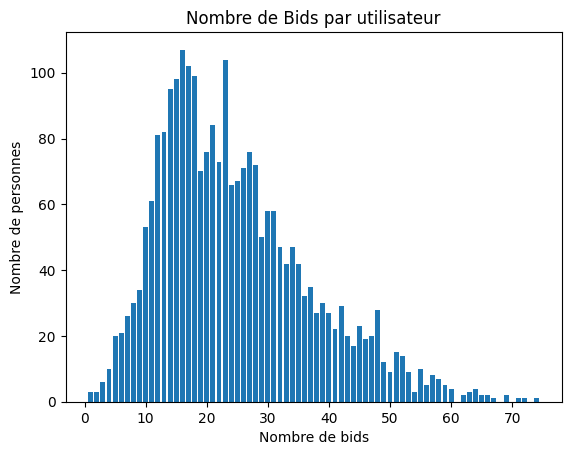

In [ ]:
#pour faire des stats
biduser={}
for i in tqdm(range(0,len(grotenseur[0]))):
  biduser[i]=[]
  for j in range(0,len(grotenseur[0][i])):
    if(grotenseur[0][i][j]>0):
      biduser[i].append(grotenseur[0][i][j])

biduser

# Calculate the average number of elements in biduser keys
total_elements = 0
for key in biduser:
  total_elements += len(biduser[key])

average_elements = total_elements / len(biduser)
print("Average number of elements per key:", average_elements)

# prompt: fait une distribution du nombre d'élements dans biduser

import matplotlib.pyplot as plt

# Calculate the distribution of number of elements
distribution = {}
for key in biduser:
  num_elements = len(biduser[key])
  if num_elements not in distribution:
    distribution[num_elements] = 0
  distribution[num_elements] += 1

# Plot the distribution
plt.bar(distribution.keys(), distribution.values())
plt.xlabel("Nombre de bids")
plt.ylabel("Nombre de personnes")
plt.title("Nombre de Bids par utilisateur")
plt.show()

# prompt: fait une distribution des valeurs dans grotenseur[1]

# Flatten the tensor to get all values
all_values = grotenseur[1].flatten()


In [ ]:
torch.median(grotenseur[1])

tensor(0.5190, dtype=torch.float64)

In [ ]:
torch.mean(grotenseur[1])

tensor(0.5188, dtype=torch.float64)

In [ ]:
biduser={}
for i in tqdm(range(0,len(grotenseur[0]))):
  biduser[i]=[]
  for j in range(0,len(grotenseur[0][i])):
    if(grotenseur[0][i][j]>0):
      biduser[i].append((j,grotenseur[0][i][j])) #UN TUPLE

100%|██████████| 2483/2483 [01:02<00:00, 39.71it/s]


In [ ]:
# #TU PEUX IGNORER CETTE CELL SI TU VEUX PAS DE GRAPHES
# # prompt: generate a distribution for the tpms of all bids in grotenseur
# all_tpms_with_bids = []

# # Flatten the tensor to get all TPMS values corresponding to bids
# for k in range (0,4):
#   all_tpms_with_bids = []
#   for i in range(len(grotenseur[0])):
#     for j in range(len(grotenseur[0][i])):
#       if grotenseur[0][i][j] == k:
#         all_tpms_with_bids.append(grotenseur[1][i][j].item())

#   # Create a histogram
#   plt.hist(all_tpms_with_bids, bins=50)
#   plt.xlabel("TPMS Values")
#   plt.ylabel("Frequency")
#   plt.title("Distribution of TPMS for Bids =="+str(k))
#   plt.show()


In [ ]:
# prompt: mean of TPMS for each level of bid (1,2,3)

mean_tpms_per_bid = {}
count_per_bid = {}

for i in range(len(grotenseur[0])):
  for j in range(len(grotenseur[0][i])):
    bid = grotenseur[0][i][j].item()
    if bid > 0:
      if bid not in mean_tpms_per_bid:
        mean_tpms_per_bid[bid] = 0
        count_per_bid[bid] = 0
      mean_tpms_per_bid[bid] += grotenseur[1][i][j].item()
      count_per_bid[bid] += 1

for bid in mean_tpms_per_bid:
  mean_tpms_per_bid[bid] /= count_per_bid[bid]

print("Mean TPMS per bid level:")
for bid, mean_tpms in mean_tpms_per_bid.items():
  print(f"Bid {int(bid)}: {mean_tpms:.4f}")


Mean TPMS per bid level:
Bid 3: 0.7453
Bid 2: 0.6687
Bid 1: 0.6181


In [ ]:
# dicoTPMS={}
# for user, bids in biduser.items():
#   dicoTPMS[user]=[]
#   #print(f"User {user}: {bids}")
#   dicoTPMS[user].append((grotenseur[1][user][bids]))
# dicoTPMS

In [ ]:
# prompt: make a distribution of dicoTPMS

# all_tpms = []
# for user_tpms in dicoTPMS.values():
#   all_tpms.extend(user_tpms[0].tolist())  # Extract TPM values and flatten the list

# plt.hist(all_tpms, bins=50)
# plt.xlabel("Valeurs TPMS")
# plt.ylabel("Fréquence")
# plt.title("Distribution des valeurs TPMS pour les articles biddés")
# plt.show()


In [ ]:
# prompt: generate 100 random numbers between 0 and len(grotenseur[0])

import random

def ajout_malicious_bids(tenseur,Nombredetricheurs,autretenseur=grotenseur):
  tenseur[2]=torch.zeros(tenseur[2].shape)
  malicious_authors = random.sample(range(len(autretenseur[0])), Nombredetricheurs)
  malicious_papers = random.sample(range(len(autretenseur[0][0])), Nombredetricheurs)
  malicious_pairs = {}

# Iterate through malicious authors and assign a malicious paper to each
  for i, author in enumerate(malicious_authors):
    malicious_pairs[author] = malicious_papers[i]

  found_pairs = []
  for author, paper in malicious_pairs.items():
    if tenseur[0][author][paper] > 0:
      found_pairs.append((author, paper))

  # Print the found pairs
  if found_pairs:
    print("Malicious pairs found in grotenseur[0]:")
    for author, paper in found_pairs:
      print(f"Author: {author}, Paper: {paper}")
  else:
    print("No malicious pairs found in grotenseur[0]")
  for author, paper in found_pairs:
    del malicious_pairs[author]

  print("Remaining malicious pairs:", len(malicious_pairs))
  for author in malicious_authors: #IL NE BID QUE SUR LES PAPIERS SURLESQUELS IL TRICHE
    tenseur[0][author]=torch.zeros(len(grotenseur[0][author]))

  for author, paper in malicious_pairs.items():
    tenseur[0][author][paper]=3 #IL BID EAGER
    tenseur[2][author][paper]=1 #ON LE CONSIDERE COMME UN TRICHEUR
  tenseur[2] = 1 - autretenseur[2]


In [ ]:
grotenseur[2].shape

torch.Size([2483, 2446])

In [ ]:
# ajout_malicious_bids(grotenseur,100)
# print(len(grotenseur[2]))
# print(grotenseur[2].count_nonzero())
# grotenseur[2] = 1 - grotenseur[2]
# print(len(grotenseur[2].view(-1))-grotenseur[2].count_nonzero())
ajout_malicious_bids(grotenseur,100)
print(len(grotenseur[2]))
grotenseur[1] = 1 - grotenseur[1]

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 100
2483


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
print(grotenseur[0].shape)

torch.Size([2483, 2446])


# On remplace tenseur poisoned

In [ ]:
# prompt: open /content/drive/MyDrive/COLLUDING/dicoaexporter.json as a dictionary

import json

with open('/content/drive/MyDrive/COLLUDING/dicoaexporter.json', 'r') as f:
  data = json.load(f)

# Now you can work with the 'data' dictionary
lestuples=[]
lesvaleurs=[]
for key in data.keys():
  lestuples.append(eval(key))
lestuples
for val in data.values():
  lesvaleurs.append(val)
lesvaleurs



tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]], dtype=torch.float64)

In [ ]:
lesvaleurs[0]

0.8090149041583631

In [ ]:
lestuples[0]

(168, 213)

In [ ]:
def remplacertricheurs(letenseur,lestuple,lesscores):
  letenseur[2]=0
  for truc in lestuple:
    letenseur[0][truc[0]][truc[1]]=3
    letenseur[1][truc[0]][truc[1]]=lesscores[lestuple.index(truc)]
    letenseur[2][truc[0]][truc[1]]=1

  return letenseur

modifiax=remplacertricheurs(grotenseur,lestuples,lesvaleurs)


In [ ]:
modifiax[2][168,213]

tensor(1., dtype=torch.float64)

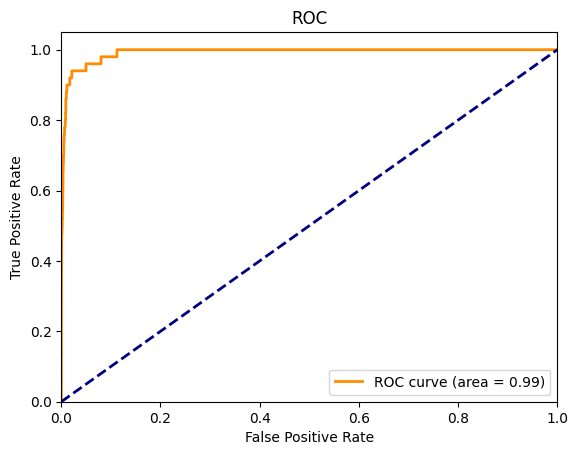

In [ ]:
def ROC_tricheursMODIFIEBIS(letenseur):
  scoreEAGER=[]
  tricheurEAGER=[]
  for i in range (0,len(letenseur[0])):
    for j in range (0,len(letenseur[0][i])):
      if letenseur[0][i][j]==3:
        scoreEAGER.append(letenseur[1][i][j])
        tricheurEAGER.append(letenseur[2][i][j])


  fpr, tpr, thresholds = metrics.roc_curve(tricheurEAGER,scoreEAGER)
  roc_auc = metrics.auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.show()

ROC_tricheursMODIFIEBIS(modifiax)

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 1


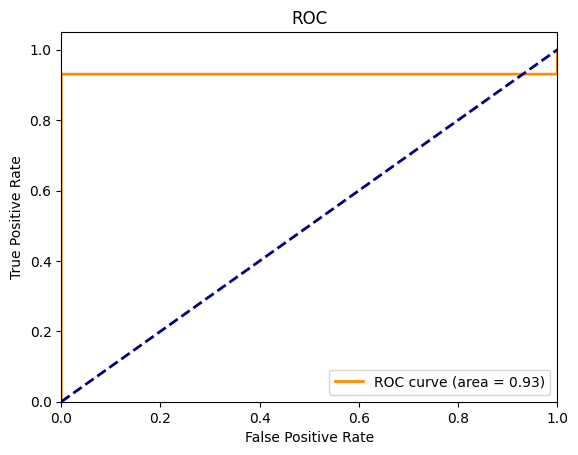

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 10


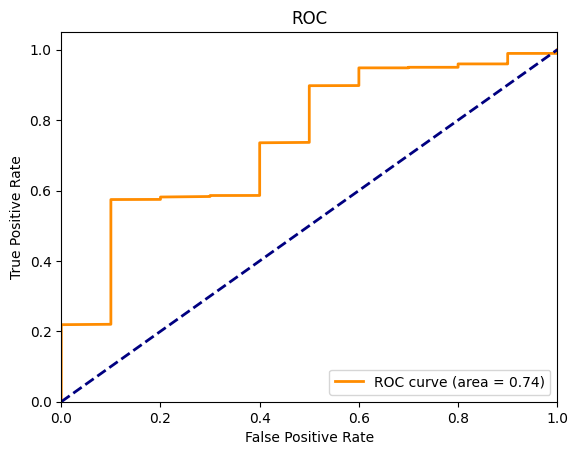

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 50


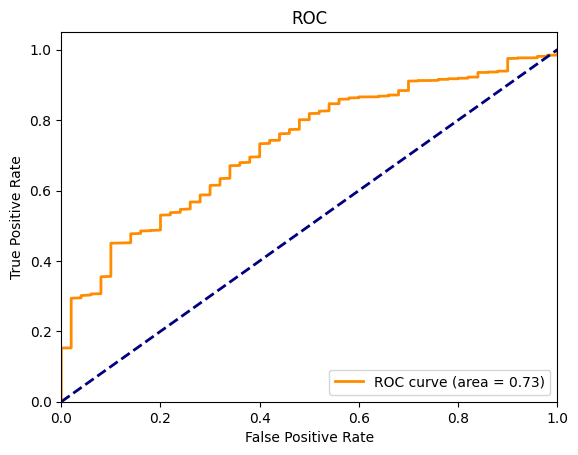

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 100


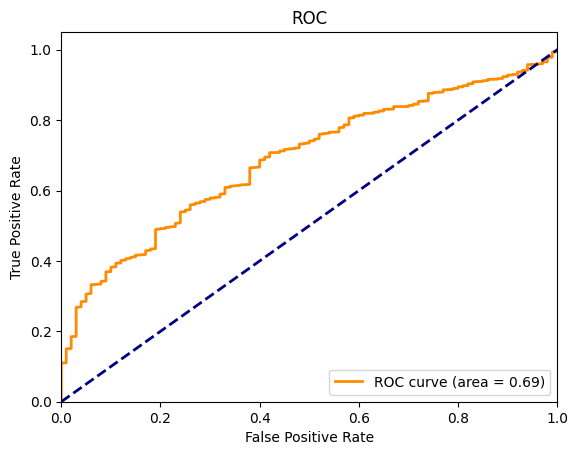

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 200


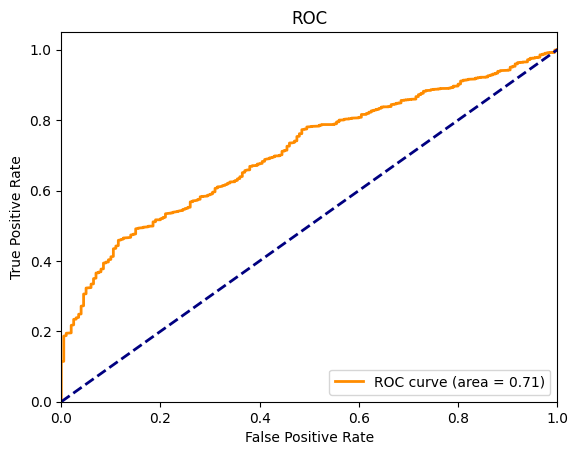

Malicious pairs found in grotenseur[0]:
Author: 393, Paper: 769
Remaining malicious pairs: 499


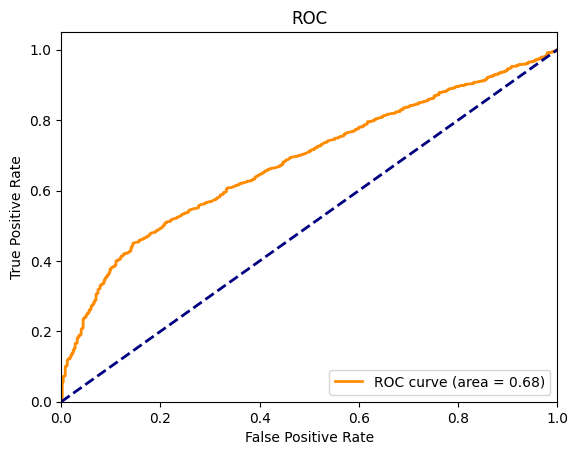

Malicious pairs found in grotenseur[0]:
Author: 2468, Paper: 535
Author: 795, Paper: 2331
Remaining malicious pairs: 998


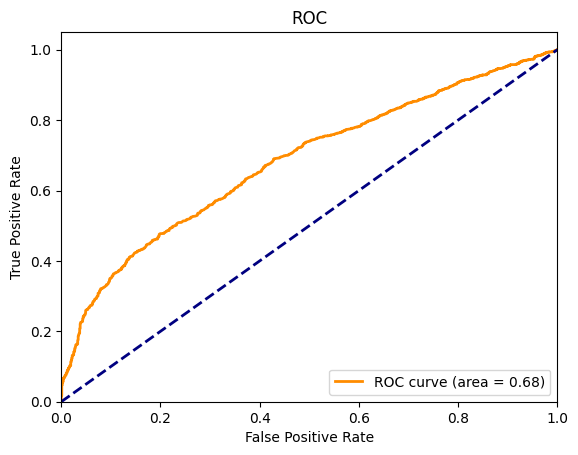

In [ ]:
def ROC_tricheurs_liste(letenseur, nb_tricheurs,autretenseur=grotenseur):
  ajout_malicious_bids(letenseur,nb_tricheurs,autretenseur)
  #letenseur[1] = 1 - letenseur[1]
  scoreEAGER=[]
  tricheurEAGER=[]
  for i in range (0,len(letenseur[0])):
    for j in range (0,len(letenseur[0][i])):
      if letenseur[0][i][j]==3:
        scoreEAGER.append(letenseur[1][i][j])
        tricheurEAGER.append(letenseur[2][i][j])


  fpr, tpr, thresholds = metrics.roc_curve(tricheurEAGER,scoreEAGER)
  roc_auc = metrics.auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.show()

liste_nb_tricheurs = [1, 10, 50, 100, 200,500,1000]
for i in liste_nb_tricheurs:
  ROC_tricheurs_liste(grotenseur,i)

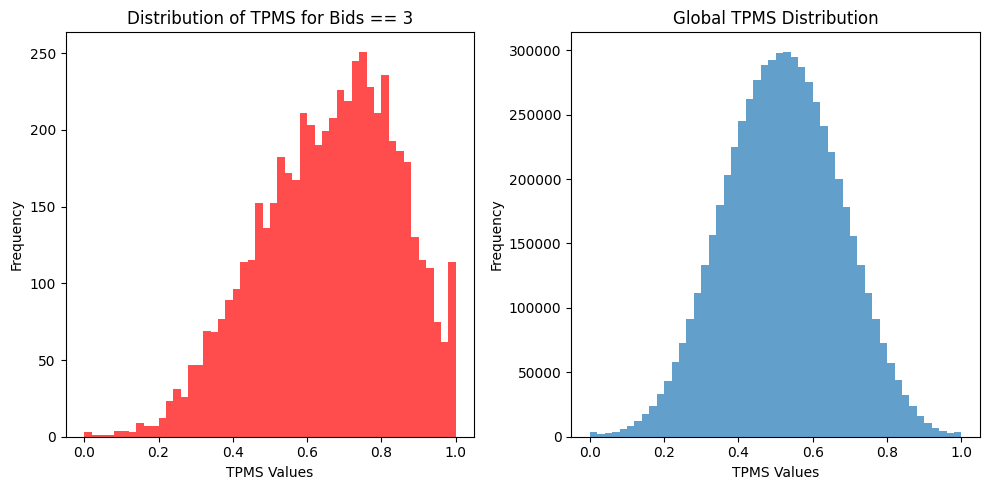

In [ ]:
# prompt: can you make a graph that shows the distribution of bids==3 vs global TPMS distribution ?

# Extract TPMS values for bids == 3
bids_3_tpms = []
for i in range(len(grotenseur[0])):
  for j in range(len(grotenseur[0][i])):
    if grotenseur[0][i][j] == 3:
      bids_3_tpms.append(grotenseur[1][i][j].item())

# Extract all TPMS values
all_tpms = grotenseur[1].flatten().tolist()

# Create histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(bids_3_tpms, bins=50, alpha=0.7, label='Bids == 3',color='red')
plt.xlabel("TPMS Values")
plt.ylabel("Frequency")
plt.title("Distribution of TPMS for Bids == 3")

plt.subplot(1, 2, 2)
plt.hist(all_tpms, bins=50, alpha=0.7, label='Global TPMS')
plt.xlabel("TPMS Values")
plt.ylabel("Frequency")
plt.title("Global TPMS Distribution")

plt.tight_layout()
plt.show()


# Avec l'encodeur Stella 1.5B

In [ ]:
# prompt: go through /content/drive/MyDrive/COLLUDING/liste-tenseurs/ and for each .pt (file) print its name

import os

# Get the list of files in the directory
files = os.listdir('/content/drive/MyDrive/COLLUDING/liste-tenseurs/')

# Iterate through the files and print the names of the .pt files
names=[]
for file in files:
  if file.endswith(".pt"):
    names.append(file)
dico={}
for name in names:
  dico[int(name[7:-3])]=name


In [ ]:
# prompt: open /content/drive/MyDrive/COLLUDING/liste-tenseurs/tenseur0.pt

import torch
liste_final_tensor=[]
for i in tqdm(range(len(dico))):
  tensor = torch.load('/content/drive/MyDrive/COLLUDING/liste-tenseurs/tenseur'+str(i)+'.pt')
  print(tensor.shape)  # Example: print the shape of the tensor

  final_tensor=torch.zeros(len(tensor))
  for j in range(0,len(tensor)):
    final_tensor[j]=torch.max(tensor[j])
  liste_final_tensor.append(final_tensor)

final_final_tensor=torch.stack(liste_final_tensor)
print(final_final_tensor.shape)

  0%|          | 0/2483 [00:00<?, ?it/s]<ipython-input-43-2a68b46d9e2f>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensor = torch.load('/content/drive/MyDrive/COLLUDIN

torch.Size([2446, 29])
torch.Size([2446, 38])
torch.Size([2446, 67])
torch.Size([2446, 76])
torch.Size([2446, 37])
torch.Size([2446, 110])


  0%|          | 11/2483 [00:00<01:26, 28.56it/s]

torch.Size([2446, 31])
torch.Size([2446, 67])
torch.Size([2446, 52])
torch.Size([2446, 89])
torch.Size([2446, 91])
torch.Size([2446, 62])
torch.Size([2446, 65])


  1%|          | 18/2483 [00:00<01:24, 29.27it/s]

torch.Size([2446, 85])
torch.Size([2446, 131])
torch.Size([2446, 243])
torch.Size([2446, 6])
torch.Size([2446, 95])
torch.Size([2446, 17])


  1%|          | 22/2483 [00:00<01:22, 29.87it/s]

torch.Size([2446, 13])
torch.Size([2446, 17])
torch.Size([2446, 8])
torch.Size([2446, 49])
torch.Size([2446, 41])
torch.Size([2446, 45])
torch.Size([2446, 28])


  1%|          | 30/2483 [00:00<01:19, 30.71it/s]

torch.Size([2446, 88])
torch.Size([2446, 80])
torch.Size([2446, 39])
torch.Size([2446, 7])
torch.Size([2446, 28])
torch.Size([2446, 95])
torch.Size([2446, 177])


  2%|▏         | 38/2483 [00:01<01:21, 29.93it/s]

torch.Size([2446, 79])
torch.Size([2446, 135])
torch.Size([2446, 11])
torch.Size([2446, 15])
torch.Size([2446, 49])
torch.Size([2446, 13])


  2%|▏         | 42/2483 [00:01<01:19, 30.80it/s]

torch.Size([2446, 67])
torch.Size([2446, 8])
torch.Size([2446, 13])
torch.Size([2446, 10])
torch.Size([2446, 53])
torch.Size([2446, 99])
torch.Size([2446, 23])


  2%|▏         | 50/2483 [00:01<01:18, 31.08it/s]

torch.Size([2446, 16])
torch.Size([2446, 33])
torch.Size([2446, 13])
torch.Size([2446, 29])
torch.Size([2446, 27])
torch.Size([2446, 20])
torch.Size([2446, 24])


  2%|▏         | 58/2483 [00:01<01:16, 31.79it/s]

torch.Size([2446, 44])
torch.Size([2446, 79])
torch.Size([2446, 72])
torch.Size([2446, 20])
torch.Size([2446, 11])
torch.Size([2446, 22])
torch.Size([2446, 31])


  3%|▎         | 66/2483 [00:02<01:14, 32.51it/s]

torch.Size([2446, 32])
torch.Size([2446, 55])
torch.Size([2446, 9])
torch.Size([2446, 14])
torch.Size([2446, 29])
torch.Size([2446, 3])
torch.Size([2446, 3])


  3%|▎         | 70/2483 [00:02<01:14, 32.30it/s]

torch.Size([2446, 36])
torch.Size([2446, 39])
torch.Size([2446, 11])
torch.Size([2446, 69])
torch.Size([2446, 24])
torch.Size([2446, 66])
torch.Size([2446, 11])


  3%|▎         | 78/2483 [00:02<01:16, 31.30it/s]

torch.Size([2446, 30])
torch.Size([2446, 34])
torch.Size([2446, 27])
torch.Size([2446, 77])
torch.Size([2446, 58])
torch.Size([2446, 86])


  3%|▎         | 86/2483 [00:02<01:18, 30.62it/s]

torch.Size([2446, 50])
torch.Size([2446, 77])
torch.Size([2446, 46])
torch.Size([2446, 15])
torch.Size([2446, 40])
torch.Size([2446, 7])
torch.Size([2446, 14])


  4%|▎         | 90/2483 [00:02<01:16, 31.08it/s]

torch.Size([2446, 3])
torch.Size([2446, 23])
torch.Size([2446, 18])
torch.Size([2446, 39])
torch.Size([2446, 16])
torch.Size([2446, 112])
torch.Size([2446, 33])


  4%|▍         | 98/2483 [00:03<01:15, 31.50it/s]

torch.Size([2446, 27])
torch.Size([2446, 23])
torch.Size([2446, 64])
torch.Size([2446, 5])
torch.Size([2446, 17])
torch.Size([2446, 8])
torch.Size([2446, 45])


  4%|▍         | 106/2483 [00:03<01:14, 31.78it/s]

torch.Size([2446, 9])
torch.Size([2446, 24])
torch.Size([2446, 41])
torch.Size([2446, 8])
torch.Size([2446, 84])
torch.Size([2446, 34])
torch.Size([2446, 156])


  5%|▍         | 114/2483 [00:03<01:14, 31.95it/s]

torch.Size([2446, 26])
torch.Size([2446, 42])
torch.Size([2446, 7])
torch.Size([2446, 12])
torch.Size([2446, 12])
torch.Size([2446, 8])
torch.Size([2446, 18])


  5%|▍         | 118/2483 [00:03<01:13, 32.13it/s]

torch.Size([2446, 11])
torch.Size([2446, 17])
torch.Size([2446, 9])
torch.Size([2446, 14])
torch.Size([2446, 8])
torch.Size([2446, 19])
torch.Size([2446, 26])


  5%|▌         | 126/2483 [00:04<01:12, 32.52it/s]

torch.Size([2446, 55])
torch.Size([2446, 34])
torch.Size([2446, 19])
torch.Size([2446, 10])
torch.Size([2446, 70])
torch.Size([2446, 19])
torch.Size([2446, 73])


  5%|▌         | 134/2483 [00:04<01:15, 31.05it/s]

torch.Size([2446, 65])
torch.Size([2446, 93])
torch.Size([2446, 97])
torch.Size([2446, 72])
torch.Size([2446, 17])
torch.Size([2446, 43])


  6%|▌         | 138/2483 [00:04<01:17, 30.13it/s]

torch.Size([2446, 69])
torch.Size([2446, 34])
torch.Size([2446, 166])
torch.Size([2446, 16])
torch.Size([2446, 71])
torch.Size([2446, 19])
torch.Size([2446, 43])


  6%|▌         | 146/2483 [00:04<01:14, 31.35it/s]

torch.Size([2446, 51])
torch.Size([2446, 34])
torch.Size([2446, 17])
torch.Size([2446, 58])
torch.Size([2446, 11])
torch.Size([2446, 14])
torch.Size([2446, 18])


  6%|▌         | 154/2483 [00:04<01:19, 29.28it/s]

torch.Size([2446, 25])
torch.Size([2446, 36])
torch.Size([2446, 28])
torch.Size([2446, 7])
torch.Size([2446, 21])
torch.Size([2446, 31])


  6%|▋         | 158/2483 [00:05<01:18, 29.62it/s]

torch.Size([2446, 23])
torch.Size([2446, 36])
torch.Size([2446, 53])
torch.Size([2446, 16])
torch.Size([2446, 33])
torch.Size([2446, 20])
torch.Size([2446, 37])


  7%|▋         | 166/2483 [00:05<01:20, 28.87it/s]

torch.Size([2446, 41])
torch.Size([2446, 239])
torch.Size([2446, 17])
torch.Size([2446, 42])
torch.Size([2446, 115])
torch.Size([2446, 61])


  7%|▋         | 174/2483 [00:05<01:17, 29.76it/s]

torch.Size([2446, 8])
torch.Size([2446, 34])
torch.Size([2446, 52])
torch.Size([2446, 66])
torch.Size([2446, 16])
torch.Size([2446, 11])
torch.Size([2446, 87])


  7%|▋         | 180/2483 [00:05<01:21, 28.36it/s]

torch.Size([2446, 16])
torch.Size([2446, 11])
torch.Size([2446, 47])
torch.Size([2446, 57])
torch.Size([2446, 33])
torch.Size([2446, 8])


  7%|▋         | 184/2483 [00:05<01:17, 29.58it/s]

torch.Size([2446, 25])
torch.Size([2446, 16])
torch.Size([2446, 24])
torch.Size([2446, 28])
torch.Size([2446, 191])
torch.Size([2446, 25])
torch.Size([2446, 49])


  8%|▊         | 192/2483 [00:06<01:14, 30.90it/s]

torch.Size([2446, 10])
torch.Size([2446, 13])
torch.Size([2446, 23])
torch.Size([2446, 85])
torch.Size([2446, 59])
torch.Size([2446, 48])
torch.Size([2446, 28])


  8%|▊         | 200/2483 [00:06<01:11, 31.79it/s]

torch.Size([2446, 39])
torch.Size([2446, 25])
torch.Size([2446, 37])
torch.Size([2446, 46])
torch.Size([2446, 49])
torch.Size([2446, 8])
torch.Size([2446, 4])


  8%|▊         | 208/2483 [00:06<01:13, 30.96it/s]

torch.Size([2446, 19])
torch.Size([2446, 16])
torch.Size([2446, 10])
torch.Size([2446, 50])
torch.Size([2446, 24])
torch.Size([2446, 154])
torch.Size([2446, 43])


  9%|▊         | 212/2483 [00:06<01:13, 30.70it/s]

torch.Size([2446, 7])
torch.Size([2446, 4])
torch.Size([2446, 16])
torch.Size([2446, 16])
torch.Size([2446, 11])
torch.Size([2446, 19])
torch.Size([2446, 23])


  9%|▉         | 220/2483 [00:07<01:12, 31.04it/s]

torch.Size([2446, 18])
torch.Size([2446, 89])
torch.Size([2446, 15])
torch.Size([2446, 32])
torch.Size([2446, 35])
torch.Size([2446, 25])


  9%|▉         | 228/2483 [00:07<01:13, 30.84it/s]

torch.Size([2446, 17])
torch.Size([2446, 36])
torch.Size([2446, 12])
torch.Size([2446, 24])
torch.Size([2446, 16])
torch.Size([2446, 226])
torch.Size([2446, 68])


  9%|▉         | 232/2483 [00:07<01:13, 30.80it/s]

torch.Size([2446, 65])
torch.Size([2446, 82])
torch.Size([2446, 37])
torch.Size([2446, 54])
torch.Size([2446, 16])
torch.Size([2446, 35])
torch.Size([2446, 23])


 10%|▉         | 240/2483 [00:07<01:12, 31.00it/s]

torch.Size([2446, 123])
torch.Size([2446, 40])
torch.Size([2446, 5])
torch.Size([2446, 3])
torch.Size([2446, 7])
torch.Size([2446, 45])
torch.Size([2446, 20])


 10%|▉         | 248/2483 [00:08<01:12, 30.91it/s]

torch.Size([2446, 4])
torch.Size([2446, 23])
torch.Size([2446, 66])
torch.Size([2446, 9])
torch.Size([2446, 7])
torch.Size([2446, 5])
torch.Size([2446, 5])


 10%|█         | 256/2483 [00:08<01:12, 30.74it/s]

torch.Size([2446, 25])
torch.Size([2446, 20])
torch.Size([2446, 31])
torch.Size([2446, 24])
torch.Size([2446, 12])
torch.Size([2446, 73])
torch.Size([2446, 8])


 10%|█         | 260/2483 [00:08<01:11, 30.96it/s]

torch.Size([2446, 191])
torch.Size([2446, 26])
torch.Size([2446, 15])
torch.Size([2446, 36])
torch.Size([2446, 35])
torch.Size([2446, 18])
torch.Size([2446, 42])


 11%|█         | 268/2483 [00:08<01:09, 31.69it/s]

torch.Size([2446, 23])
torch.Size([2446, 95])
torch.Size([2446, 21])
torch.Size([2446, 10])
torch.Size([2446, 9])
torch.Size([2446, 31])
torch.Size([2446, 47])


 11%|█         | 276/2483 [00:08<01:09, 31.95it/s]

torch.Size([2446, 7])
torch.Size([2446, 56])
torch.Size([2446, 6])
torch.Size([2446, 53])
torch.Size([2446, 73])
torch.Size([2446, 23])
torch.Size([2446, 38])


 11%|█▏        | 284/2483 [00:09<01:07, 32.42it/s]

torch.Size([2446, 26])
torch.Size([2446, 27])
torch.Size([2446, 62])
torch.Size([2446, 10])
torch.Size([2446, 14])
torch.Size([2446, 26])
torch.Size([2446, 150])


 12%|█▏        | 288/2483 [00:09<01:08, 32.01it/s]

torch.Size([2446, 31])
torch.Size([2446, 31])
torch.Size([2446, 101])
torch.Size([2446, 82])
torch.Size([2446, 61])
torch.Size([2446, 39])


 12%|█▏        | 296/2483 [00:09<01:10, 31.01it/s]

torch.Size([2446, 26])
torch.Size([2446, 13])
torch.Size([2446, 21])
torch.Size([2446, 62])
torch.Size([2446, 50])
torch.Size([2446, 32])
torch.Size([2446, 33])


 12%|█▏        | 304/2483 [00:09<01:10, 31.01it/s]

torch.Size([2446, 26])
torch.Size([2446, 54])
torch.Size([2446, 28])
torch.Size([2446, 31])
torch.Size([2446, 107])
torch.Size([2446, 140])
torch.Size([2446, 49])


 12%|█▏        | 308/2483 [00:09<01:09, 31.39it/s]

torch.Size([2446, 74])
torch.Size([2446, 23])
torch.Size([2446, 12])
torch.Size([2446, 2])
torch.Size([2446, 1])
torch.Size([2446, 5])
torch.Size([2446, 32])


 13%|█▎        | 316/2483 [00:10<01:07, 32.22it/s]

torch.Size([2446, 31])
torch.Size([2446, 42])
torch.Size([2446, 22])
torch.Size([2446, 23])
torch.Size([2446, 71])
torch.Size([2446, 57])
torch.Size([2446, 36])


 13%|█▎        | 324/2483 [00:10<01:07, 32.12it/s]

torch.Size([2446, 18])
torch.Size([2446, 25])
torch.Size([2446, 43])
torch.Size([2446, 69])
torch.Size([2446, 35])
torch.Size([2446, 59])
torch.Size([2446, 12])


 13%|█▎        | 332/2483 [00:10<01:06, 32.11it/s]

torch.Size([2446, 12])
torch.Size([2446, 39])
torch.Size([2446, 14])
torch.Size([2446, 22])
torch.Size([2446, 16])
torch.Size([2446, 16])
torch.Size([2446, 41])


 14%|█▎        | 336/2483 [00:10<01:07, 31.73it/s]

torch.Size([2446, 30])
torch.Size([2446, 22])
torch.Size([2446, 44])
torch.Size([2446, 15])
torch.Size([2446, 39])
torch.Size([2446, 4])
torch.Size([2446, 26])


 14%|█▍        | 344/2483 [00:11<01:06, 32.09it/s]

torch.Size([2446, 152])
torch.Size([2446, 48])
torch.Size([2446, 22])
torch.Size([2446, 28])
torch.Size([2446, 31])
torch.Size([2446, 41])
torch.Size([2446, 10])


 14%|█▍        | 352/2483 [00:11<01:05, 32.35it/s]

torch.Size([2446, 45])
torch.Size([2446, 4])
torch.Size([2446, 57])
torch.Size([2446, 17])
torch.Size([2446, 4])
torch.Size([2446, 7])
torch.Size([2446, 44])


 14%|█▍        | 360/2483 [00:11<01:05, 32.50it/s]

torch.Size([2446, 27])
torch.Size([2446, 74])
torch.Size([2446, 37])
torch.Size([2446, 19])
torch.Size([2446, 14])
torch.Size([2446, 27])
torch.Size([2446, 12])


 15%|█▍        | 364/2483 [00:11<01:09, 30.68it/s]

torch.Size([2446, 14])
torch.Size([2446, 69])
torch.Size([2446, 111])
torch.Size([2446, 6])
torch.Size([2446, 11])
torch.Size([2446, 26])
torch.Size([2446, 13])


 15%|█▍        | 371/2483 [00:11<01:11, 29.45it/s]

torch.Size([2446, 24])
torch.Size([2446, 14])
torch.Size([2446, 58])
torch.Size([2446, 67])
torch.Size([2446, 82])
torch.Size([2446, 62])
torch.Size([2446, 59])


 15%|█▌        | 379/2483 [00:12<01:08, 30.57it/s]

torch.Size([2446, 13])
torch.Size([2446, 32])
torch.Size([2446, 38])
torch.Size([2446, 22])
torch.Size([2446, 57])
torch.Size([2446, 10])
torch.Size([2446, 19])


 16%|█▌        | 387/2483 [00:12<01:09, 30.20it/s]

torch.Size([2446, 67])
torch.Size([2446, 22])
torch.Size([2446, 42])
torch.Size([2446, 41])
torch.Size([2446, 86])
torch.Size([2446, 86])


 16%|█▌        | 391/2483 [00:12<01:09, 30.09it/s]

torch.Size([2446, 90])
torch.Size([2446, 131])
torch.Size([2446, 60])
torch.Size([2446, 23])
torch.Size([2446, 29])
torch.Size([2446, 46])
torch.Size([2446, 122])


 16%|█▌        | 399/2483 [00:12<01:06, 31.20it/s]

torch.Size([2446, 32])
torch.Size([2446, 13])
torch.Size([2446, 31])
torch.Size([2446, 21])
torch.Size([2446, 17])
torch.Size([2446, 85])
torch.Size([2446, 123])


 16%|█▋        | 407/2483 [00:13<01:05, 31.46it/s]

torch.Size([2446, 150])
torch.Size([2446, 23])
torch.Size([2446, 25])
torch.Size([2446, 38])
torch.Size([2446, 73])
torch.Size([2446, 22])
torch.Size([2446, 41])


 17%|█▋        | 415/2483 [00:13<01:04, 32.23it/s]

torch.Size([2446, 32])
torch.Size([2446, 12])
torch.Size([2446, 16])
torch.Size([2446, 35])
torch.Size([2446, 12])
torch.Size([2446, 43])
torch.Size([2446, 70])


 17%|█▋        | 419/2483 [00:13<01:04, 32.21it/s]

torch.Size([2446, 43])
torch.Size([2446, 23])
torch.Size([2446, 61])
torch.Size([2446, 127])
torch.Size([2446, 37])
torch.Size([2446, 28])
torch.Size([2446, 22])


 17%|█▋        | 427/2483 [00:13<01:03, 32.31it/s]

torch.Size([2446, 34])
torch.Size([2446, 14])
torch.Size([2446, 37])
torch.Size([2446, 31])
torch.Size([2446, 23])
torch.Size([2446, 25])
torch.Size([2446, 25])


 18%|█▊        | 435/2483 [00:13<01:05, 31.25it/s]

torch.Size([2446, 67])
torch.Size([2446, 30])
torch.Size([2446, 40])
torch.Size([2446, 33])
torch.Size([2446, 6])
torch.Size([2446, 66])
torch.Size([2446, 26])


 18%|█▊        | 443/2483 [00:14<01:04, 31.70it/s]

torch.Size([2446, 66])
torch.Size([2446, 45])
torch.Size([2446, 102])
torch.Size([2446, 75])
torch.Size([2446, 36])
torch.Size([2446, 33])
torch.Size([2446, 46])


 18%|█▊        | 447/2483 [00:14<01:04, 31.81it/s]

torch.Size([2446, 15])
torch.Size([2446, 41])
torch.Size([2446, 43])
torch.Size([2446, 40])
torch.Size([2446, 42])
torch.Size([2446, 19])
torch.Size([2446, 18])


 18%|█▊        | 455/2483 [00:14<01:02, 32.20it/s]

torch.Size([2446, 55])
torch.Size([2446, 12])
torch.Size([2446, 21])
torch.Size([2446, 90])
torch.Size([2446, 15])
torch.Size([2446, 24])
torch.Size([2446, 48])


 19%|█▊        | 463/2483 [00:14<01:02, 32.33it/s]

torch.Size([2446, 130])
torch.Size([2446, 41])
torch.Size([2446, 15])
torch.Size([2446, 48])
torch.Size([2446, 50])
torch.Size([2446, 15])
torch.Size([2446, 10])


 19%|█▉        | 471/2483 [00:15<01:02, 32.40it/s]

torch.Size([2446, 26])
torch.Size([2446, 14])
torch.Size([2446, 9])
torch.Size([2446, 80])
torch.Size([2446, 25])
torch.Size([2446, 18])
torch.Size([2446, 16])


 19%|█▉        | 475/2483 [00:15<01:02, 32.36it/s]

torch.Size([2446, 4])
torch.Size([2446, 23])
torch.Size([2446, 13])
torch.Size([2446, 46])
torch.Size([2446, 26])
torch.Size([2446, 40])
torch.Size([2446, 26])


 19%|█▉        | 483/2483 [00:15<01:02, 31.94it/s]

torch.Size([2446, 27])
torch.Size([2446, 26])
torch.Size([2446, 136])
torch.Size([2446, 26])
torch.Size([2446, 10])
torch.Size([2446, 34])


 20%|█▉        | 491/2483 [00:15<01:04, 31.09it/s]

torch.Size([2446, 25])
torch.Size([2446, 7])
torch.Size([2446, 33])
torch.Size([2446, 43])
torch.Size([2446, 18])
torch.Size([2446, 27])
torch.Size([2446, 66])


 20%|█▉        | 495/2483 [00:15<01:05, 30.44it/s]

torch.Size([2446, 55])
torch.Size([2446, 48])
torch.Size([2446, 29])
torch.Size([2446, 47])
torch.Size([2446, 15])
torch.Size([2446, 12])
torch.Size([2446, 47])


 20%|██        | 503/2483 [00:16<01:03, 31.32it/s]

torch.Size([2446, 30])
torch.Size([2446, 34])
torch.Size([2446, 22])
torch.Size([2446, 34])
torch.Size([2446, 15])
torch.Size([2446, 44])
torch.Size([2446, 51])


 21%|██        | 511/2483 [00:16<01:04, 30.42it/s]

torch.Size([2446, 36])
torch.Size([2446, 42])
torch.Size([2446, 35])
torch.Size([2446, 40])
torch.Size([2446, 29])
torch.Size([2446, 33])


 21%|██        | 515/2483 [00:16<01:03, 30.78it/s]

torch.Size([2446, 25])
torch.Size([2446, 20])
torch.Size([2446, 155])
torch.Size([2446, 66])
torch.Size([2446, 34])
torch.Size([2446, 147])
torch.Size([2446, 5])


 21%|██        | 523/2483 [00:16<01:03, 30.73it/s]

torch.Size([2446, 122])
torch.Size([2446, 26])
torch.Size([2446, 49])
torch.Size([2446, 46])
torch.Size([2446, 78])
torch.Size([2446, 163])
torch.Size([2446, 56])


 21%|██▏       | 531/2483 [00:17<01:02, 31.47it/s]

torch.Size([2446, 74])
torch.Size([2446, 16])
torch.Size([2446, 21])
torch.Size([2446, 15])
torch.Size([2446, 12])
torch.Size([2446, 16])
torch.Size([2446, 21])


 22%|██▏       | 539/2483 [00:17<01:00, 31.95it/s]

torch.Size([2446, 34])
torch.Size([2446, 59])
torch.Size([2446, 49])
torch.Size([2446, 50])
torch.Size([2446, 10])
torch.Size([2446, 8])
torch.Size([2446, 36])


 22%|██▏       | 543/2483 [00:17<01:02, 31.26it/s]

torch.Size([2446, 53])
torch.Size([2446, 119])
torch.Size([2446, 41])
torch.Size([2446, 58])
torch.Size([2446, 11])
torch.Size([2446, 25])
torch.Size([2446, 110])


 22%|██▏       | 551/2483 [00:17<01:01, 31.59it/s]

torch.Size([2446, 45])
torch.Size([2446, 153])
torch.Size([2446, 51])
torch.Size([2446, 18])
torch.Size([2446, 26])
torch.Size([2446, 57])
torch.Size([2446, 51])


 23%|██▎       | 559/2483 [00:17<01:00, 31.92it/s]

torch.Size([2446, 28])
torch.Size([2446, 34])
torch.Size([2446, 13])
torch.Size([2446, 48])
torch.Size([2446, 63])
torch.Size([2446, 48])
torch.Size([2446, 45])


 23%|██▎       | 567/2483 [00:18<01:00, 31.88it/s]

torch.Size([2446, 16])
torch.Size([2446, 33])
torch.Size([2446, 69])
torch.Size([2446, 33])
torch.Size([2446, 196])
torch.Size([2446, 14])
torch.Size([2446, 110])


 23%|██▎       | 571/2483 [00:18<01:00, 31.60it/s]

torch.Size([2446, 12])
torch.Size([2446, 8])
torch.Size([2446, 41])
torch.Size([2446, 29])
torch.Size([2446, 22])
torch.Size([2446, 17])
torch.Size([2446, 13])


 23%|██▎       | 579/2483 [00:18<01:01, 30.75it/s]

torch.Size([2446, 27])
torch.Size([2446, 15])
torch.Size([2446, 18])
torch.Size([2446, 21])
torch.Size([2446, 18])
torch.Size([2446, 78])


 24%|██▎       | 587/2483 [00:18<01:02, 30.29it/s]

torch.Size([2446, 22])
torch.Size([2446, 18])
torch.Size([2446, 48])
torch.Size([2446, 108])
torch.Size([2446, 24])
torch.Size([2446, 32])
torch.Size([2446, 118])


 24%|██▍       | 591/2483 [00:18<01:01, 30.77it/s]

torch.Size([2446, 42])
torch.Size([2446, 18])
torch.Size([2446, 52])
torch.Size([2446, 9])
torch.Size([2446, 10])
torch.Size([2446, 18])
torch.Size([2446, 19])


 24%|██▍       | 599/2483 [00:19<00:59, 31.42it/s]

torch.Size([2446, 22])
torch.Size([2446, 45])
torch.Size([2446, 12])
torch.Size([2446, 57])
torch.Size([2446, 13])
torch.Size([2446, 55])
torch.Size([2446, 8])


 24%|██▍       | 607/2483 [00:19<00:59, 31.35it/s]

torch.Size([2446, 165])
torch.Size([2446, 22])
torch.Size([2446, 7])
torch.Size([2446, 45])
torch.Size([2446, 40])
torch.Size([2446, 89])
torch.Size([2446, 40])


 25%|██▍       | 615/2483 [00:19<00:59, 31.65it/s]

torch.Size([2446, 109])
torch.Size([2446, 42])
torch.Size([2446, 41])
torch.Size([2446, 44])
torch.Size([2446, 24])
torch.Size([2446, 10])
torch.Size([2446, 33])


 25%|██▍       | 619/2483 [00:19<00:59, 31.53it/s]

torch.Size([2446, 11])
torch.Size([2446, 34])
torch.Size([2446, 42])
torch.Size([2446, 7])
torch.Size([2446, 7])
torch.Size([2446, 20])
torch.Size([2446, 26])


 25%|██▌       | 627/2483 [00:20<00:59, 31.23it/s]

torch.Size([2446, 82])
torch.Size([2446, 26])
torch.Size([2446, 59])
torch.Size([2446, 7])
torch.Size([2446, 168])
torch.Size([2446, 13])
torch.Size([2446, 37])


 26%|██▌       | 635/2483 [00:20<00:59, 30.98it/s]

torch.Size([2446, 15])
torch.Size([2446, 11])
torch.Size([2446, 109])
torch.Size([2446, 6])
torch.Size([2446, 13])
torch.Size([2446, 21])
torch.Size([2446, 57])


 26%|██▌       | 643/2483 [00:20<01:00, 30.35it/s]

torch.Size([2446, 16])
torch.Size([2446, 28])
torch.Size([2446, 32])
torch.Size([2446, 12])
torch.Size([2446, 21])
torch.Size([2446, 19])


 26%|██▌       | 647/2483 [00:20<00:59, 30.80it/s]

torch.Size([2446, 16])
torch.Size([2446, 56])
torch.Size([2446, 9])
torch.Size([2446, 38])
torch.Size([2446, 16])
torch.Size([2446, 10])
torch.Size([2446, 19])


 26%|██▋       | 655/2483 [00:21<01:02, 29.16it/s]

torch.Size([2446, 80])
torch.Size([2446, 256])
torch.Size([2446, 46])
torch.Size([2446, 35])
torch.Size([2446, 17])
torch.Size([2446, 9])


 27%|██▋       | 659/2483 [00:21<01:01, 29.60it/s]

torch.Size([2446, 15])
torch.Size([2446, 81])
torch.Size([2446, 33])
torch.Size([2446, 34])
torch.Size([2446, 8])
torch.Size([2446, 35])
torch.Size([2446, 16])


 27%|██▋       | 667/2483 [00:21<00:58, 31.07it/s]

torch.Size([2446, 76])
torch.Size([2446, 75])
torch.Size([2446, 11])
torch.Size([2446, 21])
torch.Size([2446, 55])
torch.Size([2446, 25])
torch.Size([2446, 16])


 27%|██▋       | 675/2483 [00:21<00:57, 31.54it/s]

torch.Size([2446, 45])
torch.Size([2446, 26])
torch.Size([2446, 88])
torch.Size([2446, 15])
torch.Size([2446, 21])
torch.Size([2446, 54])
torch.Size([2446, 9])


 28%|██▊       | 683/2483 [00:21<00:56, 31.78it/s]

torch.Size([2446, 9])
torch.Size([2446, 18])
torch.Size([2446, 22])
torch.Size([2446, 10])
torch.Size([2446, 135])
torch.Size([2446, 49])
torch.Size([2446, 28])


 28%|██▊       | 687/2483 [00:22<00:57, 31.42it/s]

torch.Size([2446, 20])
torch.Size([2446, 37])
torch.Size([2446, 49])
torch.Size([2446, 23])
torch.Size([2446, 37])
torch.Size([2446, 39])
torch.Size([2446, 17])


 28%|██▊       | 695/2483 [00:22<00:55, 32.04it/s]

torch.Size([2446, 13])
torch.Size([2446, 20])
torch.Size([2446, 23])
torch.Size([2446, 101])
torch.Size([2446, 31])
torch.Size([2446, 65])
torch.Size([2446, 9])


 28%|██▊       | 703/2483 [00:22<00:55, 31.84it/s]

torch.Size([2446, 78])
torch.Size([2446, 20])
torch.Size([2446, 43])
torch.Size([2446, 35])
torch.Size([2446, 21])
torch.Size([2446, 64])
torch.Size([2446, 60])


 29%|██▊       | 711/2483 [00:22<00:55, 32.08it/s]

torch.Size([2446, 5])
torch.Size([2446, 24])
torch.Size([2446, 33])
torch.Size([2446, 71])
torch.Size([2446, 25])
torch.Size([2446, 91])
torch.Size([2446, 33])


 29%|██▉       | 715/2483 [00:22<00:55, 31.83it/s]

torch.Size([2446, 121])
torch.Size([2446, 95])
torch.Size([2446, 95])
torch.Size([2446, 69])
torch.Size([2446, 26])
torch.Size([2446, 69])
torch.Size([2446, 82])


 29%|██▉       | 723/2483 [00:23<00:57, 30.41it/s]

torch.Size([2446, 14])
torch.Size([2446, 44])
torch.Size([2446, 26])
torch.Size([2446, 63])
torch.Size([2446, 74])
torch.Size([2446, 37])


 29%|██▉       | 731/2483 [00:23<00:57, 30.71it/s]

torch.Size([2446, 8])
torch.Size([2446, 133])
torch.Size([2446, 60])
torch.Size([2446, 50])
torch.Size([2446, 114])
torch.Size([2446, 22])
torch.Size([2446, 11])


 30%|██▉       | 735/2483 [00:23<00:57, 30.52it/s]

torch.Size([2446, 13])
torch.Size([2446, 41])
torch.Size([2446, 118])
torch.Size([2446, 45])
torch.Size([2446, 103])
torch.Size([2446, 18])
torch.Size([2446, 13])


 30%|██▉       | 743/2483 [00:23<00:54, 31.66it/s]

torch.Size([2446, 54])
torch.Size([2446, 26])
torch.Size([2446, 46])
torch.Size([2446, 51])
torch.Size([2446, 52])
torch.Size([2446, 78])
torch.Size([2446, 33])


 30%|███       | 751/2483 [00:24<00:54, 31.71it/s]

torch.Size([2446, 131])
torch.Size([2446, 24])
torch.Size([2446, 30])
torch.Size([2446, 46])
torch.Size([2446, 14])
torch.Size([2446, 37])
torch.Size([2446, 17])


 31%|███       | 759/2483 [00:24<00:54, 31.78it/s]

torch.Size([2446, 39])
torch.Size([2446, 110])
torch.Size([2446, 41])
torch.Size([2446, 128])
torch.Size([2446, 62])
torch.Size([2446, 30])
torch.Size([2446, 27])


 31%|███       | 763/2483 [00:24<00:53, 32.01it/s]

torch.Size([2446, 40])
torch.Size([2446, 105])
torch.Size([2446, 47])
torch.Size([2446, 33])
torch.Size([2446, 22])
torch.Size([2446, 45])
torch.Size([2446, 27])


 31%|███       | 771/2483 [00:24<00:53, 32.27it/s]

torch.Size([2446, 44])
torch.Size([2446, 32])
torch.Size([2446, 29])
torch.Size([2446, 17])
torch.Size([2446, 68])
torch.Size([2446, 35])
torch.Size([2446, 48])


 31%|███▏      | 779/2483 [00:24<00:52, 32.27it/s]

torch.Size([2446, 44])
torch.Size([2446, 25])
torch.Size([2446, 16])
torch.Size([2446, 37])
torch.Size([2446, 51])
torch.Size([2446, 77])
torch.Size([2446, 11])


 32%|███▏      | 787/2483 [00:25<00:52, 32.59it/s]

torch.Size([2446, 77])
torch.Size([2446, 8])
torch.Size([2446, 17])
torch.Size([2446, 18])
torch.Size([2446, 11])
torch.Size([2446, 17])
torch.Size([2446, 25])


 32%|███▏      | 791/2483 [00:25<00:51, 32.62it/s]

torch.Size([2446, 10])
torch.Size([2446, 14])
torch.Size([2446, 41])
torch.Size([2446, 36])
torch.Size([2446, 26])
torch.Size([2446, 59])
torch.Size([2446, 24])


 32%|███▏      | 799/2483 [00:25<00:53, 31.48it/s]

torch.Size([2446, 28])
torch.Size([2446, 39])
torch.Size([2446, 19])
torch.Size([2446, 33])
torch.Size([2446, 15])
torch.Size([2446, 59])
torch.Size([2446, 49])


 33%|███▎      | 807/2483 [00:25<00:53, 31.17it/s]

torch.Size([2446, 209])
torch.Size([2446, 92])
torch.Size([2446, 33])
torch.Size([2446, 71])
torch.Size([2446, 7])
torch.Size([2446, 50])
torch.Size([2446, 58])


 33%|███▎      | 815/2483 [00:26<00:53, 31.13it/s]

torch.Size([2446, 100])
torch.Size([2446, 43])
torch.Size([2446, 92])
torch.Size([2446, 17])
torch.Size([2446, 72])
torch.Size([2446, 19])
torch.Size([2446, 37])


 33%|███▎      | 819/2483 [00:26<00:53, 31.25it/s]

torch.Size([2446, 114])
torch.Size([2446, 60])
torch.Size([2446, 26])
torch.Size([2446, 88])
torch.Size([2446, 146])
torch.Size([2446, 113])
torch.Size([2446, 61])


 33%|███▎      | 827/2483 [00:26<00:53, 31.19it/s]

torch.Size([2446, 12])
torch.Size([2446, 28])
torch.Size([2446, 53])
torch.Size([2446, 26])
torch.Size([2446, 13])
torch.Size([2446, 29])
torch.Size([2446, 49])


 34%|███▎      | 835/2483 [00:26<00:52, 31.60it/s]

torch.Size([2446, 23])
torch.Size([2446, 48])
torch.Size([2446, 24])
torch.Size([2446, 26])
torch.Size([2446, 22])
torch.Size([2446, 75])
torch.Size([2446, 42])


 34%|███▍      | 843/2483 [00:26<00:51, 31.70it/s]

torch.Size([2446, 21])
torch.Size([2446, 29])
torch.Size([2446, 80])
torch.Size([2446, 18])
torch.Size([2446, 46])
torch.Size([2446, 22])
torch.Size([2446, 30])


 34%|███▍      | 847/2483 [00:27<00:51, 31.72it/s]

torch.Size([2446, 67])
torch.Size([2446, 20])
torch.Size([2446, 13])
torch.Size([2446, 17])
torch.Size([2446, 78])
torch.Size([2446, 106])
torch.Size([2446, 48])


 34%|███▍      | 855/2483 [00:27<00:50, 32.26it/s]

torch.Size([2446, 67])
torch.Size([2446, 37])
torch.Size([2446, 73])
torch.Size([2446, 46])
torch.Size([2446, 67])
torch.Size([2446, 44])
torch.Size([2446, 23])


 35%|███▍      | 863/2483 [00:27<00:50, 32.18it/s]

torch.Size([2446, 31])
torch.Size([2446, 40])
torch.Size([2446, 26])
torch.Size([2446, 33])
torch.Size([2446, 49])
torch.Size([2446, 12])
torch.Size([2446, 66])


 35%|███▌      | 871/2483 [00:27<00:52, 30.94it/s]

torch.Size([2446, 63])
torch.Size([2446, 31])
torch.Size([2446, 32])
torch.Size([2446, 51])
torch.Size([2446, 47])
torch.Size([2446, 24])


 35%|███▌      | 875/2483 [00:28<00:51, 31.00it/s]

torch.Size([2446, 14])
torch.Size([2446, 38])
torch.Size([2446, 31])
torch.Size([2446, 50])
torch.Size([2446, 42])
torch.Size([2446, 12])
torch.Size([2446, 1])


 36%|███▌      | 883/2483 [00:28<00:50, 31.65it/s]

torch.Size([2446, 4])
torch.Size([2446, 28])
torch.Size([2446, 47])
torch.Size([2446, 104])
torch.Size([2446, 78])
torch.Size([2446, 36])
torch.Size([2446, 5])


 36%|███▌      | 891/2483 [00:28<00:49, 32.04it/s]

torch.Size([2446, 17])
torch.Size([2446, 15])
torch.Size([2446, 92])
torch.Size([2446, 57])
torch.Size([2446, 71])
torch.Size([2446, 59])
torch.Size([2446, 43])


 36%|███▌      | 895/2483 [00:28<00:49, 32.07it/s]

torch.Size([2446, 12])
torch.Size([2446, 47])
torch.Size([2446, 35])
torch.Size([2446, 41])
torch.Size([2446, 25])
torch.Size([2446, 101])
torch.Size([2446, 47])


 36%|███▋      | 903/2483 [00:28<00:49, 32.08it/s]

torch.Size([2446, 10])
torch.Size([2446, 16])
torch.Size([2446, 90])
torch.Size([2446, 78])
torch.Size([2446, 50])
torch.Size([2446, 87])
torch.Size([2446, 28])


 37%|███▋      | 911/2483 [00:29<00:48, 32.44it/s]

torch.Size([2446, 15])
torch.Size([2446, 35])
torch.Size([2446, 23])
torch.Size([2446, 16])
torch.Size([2446, 33])
torch.Size([2446, 94])
torch.Size([2446, 15])


 37%|███▋      | 919/2483 [00:29<00:48, 32.02it/s]

torch.Size([2446, 11])
torch.Size([2446, 72])
torch.Size([2446, 228])
torch.Size([2446, 18])
torch.Size([2446, 66])
torch.Size([2446, 42])
torch.Size([2446, 31])


 37%|███▋      | 923/2483 [00:29<00:48, 32.23it/s]

torch.Size([2446, 8])
torch.Size([2446, 28])
torch.Size([2446, 6])
torch.Size([2446, 20])
torch.Size([2446, 28])
torch.Size([2446, 25])
torch.Size([2446, 42])


 37%|███▋      | 931/2483 [00:29<00:48, 32.15it/s]

torch.Size([2446, 73])
torch.Size([2446, 17])
torch.Size([2446, 27])
torch.Size([2446, 59])
torch.Size([2446, 198])
torch.Size([2446, 105])
torch.Size([2446, 35])


 38%|███▊      | 939/2483 [00:30<00:49, 30.99it/s]

torch.Size([2446, 44])
torch.Size([2446, 19])
torch.Size([2446, 38])
torch.Size([2446, 76])
torch.Size([2446, 29])
torch.Size([2446, 133])
torch.Size([2446, 127])


 38%|███▊      | 947/2483 [00:30<00:48, 31.88it/s]

torch.Size([2446, 34])
torch.Size([2446, 48])
torch.Size([2446, 41])
torch.Size([2446, 16])
torch.Size([2446, 45])
torch.Size([2446, 18])
torch.Size([2446, 24])


 38%|███▊      | 951/2483 [00:30<00:47, 32.30it/s]

torch.Size([2446, 57])
torch.Size([2446, 1])
torch.Size([2446, 18])
torch.Size([2446, 41])
torch.Size([2446, 32])
torch.Size([2446, 26])
torch.Size([2446, 45])


 39%|███▊      | 959/2483 [00:30<00:47, 32.06it/s]

torch.Size([2446, 84])
torch.Size([2446, 52])
torch.Size([2446, 15])
torch.Size([2446, 7])
torch.Size([2446, 7])
torch.Size([2446, 25])
torch.Size([2446, 20])


 39%|███▉      | 967/2483 [00:30<00:49, 30.85it/s]

torch.Size([2446, 10])
torch.Size([2446, 33])
torch.Size([2446, 37])
torch.Size([2446, 34])
torch.Size([2446, 37])
torch.Size([2446, 50])


 39%|███▉      | 971/2483 [00:31<00:49, 30.58it/s]

torch.Size([2446, 35])
torch.Size([2446, 29])
torch.Size([2446, 20])
torch.Size([2446, 18])
torch.Size([2446, 54])
torch.Size([2446, 100])
torch.Size([2446, 14])


 39%|███▉      | 979/2483 [00:31<00:48, 30.71it/s]

torch.Size([2446, 27])
torch.Size([2446, 22])
torch.Size([2446, 11])
torch.Size([2446, 5])
torch.Size([2446, 22])
torch.Size([2446, 20])
torch.Size([2446, 17])


 40%|███▉      | 987/2483 [00:31<00:48, 30.91it/s]

torch.Size([2446, 107])
torch.Size([2446, 60])
torch.Size([2446, 116])
torch.Size([2446, 16])
torch.Size([2446, 5])
torch.Size([2446, 93])
torch.Size([2446, 113])


 40%|████      | 995/2483 [00:31<00:47, 31.13it/s]

torch.Size([2446, 33])
torch.Size([2446, 96])
torch.Size([2446, 33])
torch.Size([2446, 28])
torch.Size([2446, 77])
torch.Size([2446, 42])
torch.Size([2446, 52])


 40%|████      | 999/2483 [00:31<00:47, 31.22it/s]

torch.Size([2446, 43])
torch.Size([2446, 4])
torch.Size([2446, 45])
torch.Size([2446, 83])
torch.Size([2446, 26])
torch.Size([2446, 106])
torch.Size([2446, 47])


 41%|████      | 1007/2483 [00:32<00:47, 31.14it/s]

torch.Size([2446, 82])
torch.Size([2446, 12])
torch.Size([2446, 31])
torch.Size([2446, 57])
torch.Size([2446, 18])
torch.Size([2446, 30])
torch.Size([2446, 16])


 41%|████      | 1015/2483 [00:32<00:48, 30.07it/s]

torch.Size([2446, 6])
torch.Size([2446, 40])
torch.Size([2446, 119])
torch.Size([2446, 16])
torch.Size([2446, 43])
torch.Size([2446, 2])


 41%|████      | 1019/2483 [00:32<00:48, 29.93it/s]

torch.Size([2446, 32])
torch.Size([2446, 45])
torch.Size([2446, 56])
torch.Size([2446, 36])
torch.Size([2446, 38])
torch.Size([2446, 10])
torch.Size([2446, 67])


 41%|████▏     | 1027/2483 [00:32<00:46, 31.29it/s]

torch.Size([2446, 85])
torch.Size([2446, 52])
torch.Size([2446, 39])
torch.Size([2446, 19])
torch.Size([2446, 48])
torch.Size([2446, 18])
torch.Size([2446, 40])


 42%|████▏     | 1035/2483 [00:33<00:48, 29.89it/s]

torch.Size([2446, 84])
torch.Size([2446, 27])
torch.Size([2446, 49])
torch.Size([2446, 9])
torch.Size([2446, 12])
torch.Size([2446, 12])


 42%|████▏     | 1039/2483 [00:33<00:47, 30.23it/s]

torch.Size([2446, 12])
torch.Size([2446, 6])
torch.Size([2446, 47])
torch.Size([2446, 59])
torch.Size([2446, 37])
torch.Size([2446, 36])
torch.Size([2446, 43])


 42%|████▏     | 1047/2483 [00:33<00:48, 29.75it/s]

torch.Size([2446, 44])
torch.Size([2446, 8])
torch.Size([2446, 90])
torch.Size([2446, 286])
torch.Size([2446, 29])
torch.Size([2446, 53])


 42%|████▏     | 1054/2483 [00:33<00:47, 30.39it/s]

torch.Size([2446, 24])
torch.Size([2446, 21])
torch.Size([2446, 77])
torch.Size([2446, 56])
torch.Size([2446, 48])
torch.Size([2446, 19])
torch.Size([2446, 44])


 43%|████▎     | 1062/2483 [00:33<00:44, 31.81it/s]

torch.Size([2446, 49])
torch.Size([2446, 29])
torch.Size([2446, 9])
torch.Size([2446, 85])
torch.Size([2446, 21])
torch.Size([2446, 27])
torch.Size([2446, 28])


 43%|████▎     | 1066/2483 [00:34<00:44, 32.05it/s]

torch.Size([2446, 9])
torch.Size([2446, 37])
torch.Size([2446, 27])
torch.Size([2446, 4])
torch.Size([2446, 17])
torch.Size([2446, 14])
torch.Size([2446, 26])


 43%|████▎     | 1074/2483 [00:34<00:44, 31.93it/s]

torch.Size([2446, 23])
torch.Size([2446, 46])
torch.Size([2446, 11])
torch.Size([2446, 39])
torch.Size([2446, 17])
torch.Size([2446, 26])
torch.Size([2446, 16])


 44%|████▎     | 1082/2483 [00:34<00:45, 30.49it/s]

torch.Size([2446, 31])
torch.Size([2446, 17])
torch.Size([2446, 25])
torch.Size([2446, 12])
torch.Size([2446, 16])
torch.Size([2446, 42])


 44%|████▎     | 1086/2483 [00:34<00:45, 30.91it/s]

torch.Size([2446, 29])
torch.Size([2446, 53])
torch.Size([2446, 37])
torch.Size([2446, 90])
torch.Size([2446, 27])
torch.Size([2446, 105])
torch.Size([2446, 4])


 44%|████▍     | 1094/2483 [00:35<00:45, 30.78it/s]

torch.Size([2446, 29])
torch.Size([2446, 41])
torch.Size([2446, 28])
torch.Size([2446, 35])
torch.Size([2446, 13])
torch.Size([2446, 40])
torch.Size([2446, 19])


 44%|████▍     | 1102/2483 [00:35<00:45, 30.31it/s]

torch.Size([2446, 89])
torch.Size([2446, 21])
torch.Size([2446, 128])
torch.Size([2446, 68])
torch.Size([2446, 54])
torch.Size([2446, 8])
torch.Size([2446, 47])


 45%|████▍     | 1110/2483 [00:35<00:44, 30.83it/s]

torch.Size([2446, 56])
torch.Size([2446, 37])
torch.Size([2446, 23])
torch.Size([2446, 45])
torch.Size([2446, 15])
torch.Size([2446, 38])
torch.Size([2446, 33])


 45%|████▍     | 1114/2483 [00:35<00:43, 31.24it/s]

torch.Size([2446, 14])
torch.Size([2446, 10])
torch.Size([2446, 21])
torch.Size([2446, 49])
torch.Size([2446, 50])
torch.Size([2446, 12])
torch.Size([2446, 36])


 45%|████▌     | 1122/2483 [00:35<00:42, 32.14it/s]

torch.Size([2446, 21])
torch.Size([2446, 40])
torch.Size([2446, 25])
torch.Size([2446, 31])
torch.Size([2446, 17])
torch.Size([2446, 33])
torch.Size([2446, 31])


 46%|████▌     | 1130/2483 [00:36<00:42, 31.58it/s]

torch.Size([2446, 20])
torch.Size([2446, 9])
torch.Size([2446, 41])
torch.Size([2446, 34])
torch.Size([2446, 23])
torch.Size([2446, 38])
torch.Size([2446, 21])


 46%|████▌     | 1138/2483 [00:36<00:43, 31.26it/s]

torch.Size([2446, 80])
torch.Size([2446, 50])
torch.Size([2446, 19])
torch.Size([2446, 24])
torch.Size([2446, 12])
torch.Size([2446, 28])
torch.Size([2446, 22])


 46%|████▌     | 1142/2483 [00:36<00:44, 30.27it/s]

torch.Size([2446, 88])
torch.Size([2446, 35])
torch.Size([2446, 25])
torch.Size([2446, 19])
torch.Size([2446, 89])
torch.Size([2446, 13])
torch.Size([2446, 23])


 46%|████▋     | 1149/2483 [00:36<00:45, 29.52it/s]

torch.Size([2446, 23])
torch.Size([2446, 46])
torch.Size([2446, 25])
torch.Size([2446, 26])
torch.Size([2446, 2])
torch.Size([2446, 2])
torch.Size([2446, 1])


 47%|████▋     | 1156/2483 [00:37<00:45, 29.18it/s]

torch.Size([2446, 2])
torch.Size([2446, 46])
torch.Size([2446, 9])
torch.Size([2446, 28])
torch.Size([2446, 8])
torch.Size([2446, 32])
torch.Size([2446, 30])


 47%|████▋     | 1164/2483 [00:37<00:43, 30.42it/s]

torch.Size([2446, 44])
torch.Size([2446, 24])
torch.Size([2446, 253])
torch.Size([2446, 19])
torch.Size([2446, 26])
torch.Size([2446, 14])
torch.Size([2446, 13])


 47%|████▋     | 1172/2483 [00:37<00:41, 31.89it/s]

torch.Size([2446, 33])
torch.Size([2446, 17])
torch.Size([2446, 10])
torch.Size([2446, 26])
torch.Size([2446, 27])
torch.Size([2446, 10])
torch.Size([2446, 30])


 48%|████▊     | 1180/2483 [00:37<00:40, 32.11it/s]

torch.Size([2446, 28])
torch.Size([2446, 11])
torch.Size([2446, 26])
torch.Size([2446, 24])
torch.Size([2446, 43])
torch.Size([2446, 49])
torch.Size([2446, 68])


 48%|████▊     | 1184/2483 [00:37<00:41, 31.46it/s]

torch.Size([2446, 5])
torch.Size([2446, 151])
torch.Size([2446, 26])
torch.Size([2446, 21])
torch.Size([2446, 41])
torch.Size([2446, 19])
torch.Size([2446, 12])


 48%|████▊     | 1192/2483 [00:38<00:40, 31.57it/s]

torch.Size([2446, 13])
torch.Size([2446, 21])
torch.Size([2446, 57])
torch.Size([2446, 30])
torch.Size([2446, 63])
torch.Size([2446, 36])
torch.Size([2446, 60])


 48%|████▊     | 1200/2483 [00:38<00:41, 30.84it/s]

torch.Size([2446, 33])
torch.Size([2446, 33])
torch.Size([2446, 113])
torch.Size([2446, 125])
torch.Size([2446, 21])
torch.Size([2446, 62])
torch.Size([2446, 32])


 49%|████▊     | 1208/2483 [00:38<00:41, 31.08it/s]

torch.Size([2446, 31])
torch.Size([2446, 43])
torch.Size([2446, 71])
torch.Size([2446, 75])
torch.Size([2446, 46])
torch.Size([2446, 58])
torch.Size([2446, 48])


 49%|████▉     | 1212/2483 [00:38<00:40, 31.36it/s]

torch.Size([2446, 51])
torch.Size([2446, 111])
torch.Size([2446, 59])
torch.Size([2446, 80])
torch.Size([2446, 12])
torch.Size([2446, 21])
torch.Size([2446, 17])


 49%|████▉     | 1220/2483 [00:39<00:39, 32.16it/s]

torch.Size([2446, 11])
torch.Size([2446, 38])
torch.Size([2446, 31])
torch.Size([2446, 6])
torch.Size([2446, 22])
torch.Size([2446, 24])
torch.Size([2446, 18])


 49%|████▉     | 1228/2483 [00:39<00:40, 30.94it/s]

torch.Size([2446, 103])
torch.Size([2446, 46])
torch.Size([2446, 1])
torch.Size([2446, 11])
torch.Size([2446, 24])
torch.Size([2446, 10])


 50%|████▉     | 1235/2483 [00:39<00:41, 29.74it/s]

torch.Size([2446, 8])
torch.Size([2446, 78])
torch.Size([2446, 16])
torch.Size([2446, 31])
torch.Size([2446, 69])
torch.Size([2446, 24])
torch.Size([2446, 34])


 50%|████▉     | 1239/2483 [00:39<00:40, 30.78it/s]

torch.Size([2446, 30])
torch.Size([2446, 21])
torch.Size([2446, 4])
torch.Size([2446, 38])
torch.Size([2446, 23])
torch.Size([2446, 70])
torch.Size([2446, 48])


 50%|█████     | 1247/2483 [00:39<00:40, 30.84it/s]

torch.Size([2446, 53])
torch.Size([2446, 14])
torch.Size([2446, 21])
torch.Size([2446, 46])
torch.Size([2446, 312])
torch.Size([2446, 17])
torch.Size([2446, 18])


 51%|█████     | 1255/2483 [00:40<00:39, 31.41it/s]

torch.Size([2446, 14])
torch.Size([2446, 24])
torch.Size([2446, 22])
torch.Size([2446, 27])
torch.Size([2446, 16])
torch.Size([2446, 12])
torch.Size([2446, 18])


 51%|█████     | 1263/2483 [00:40<00:38, 31.85it/s]

torch.Size([2446, 22])
torch.Size([2446, 16])
torch.Size([2446, 51])
torch.Size([2446, 144])
torch.Size([2446, 147])
torch.Size([2446, 27])
torch.Size([2446, 40])


 51%|█████     | 1267/2483 [00:40<00:38, 31.72it/s]

torch.Size([2446, 36])
torch.Size([2446, 43])
torch.Size([2446, 18])
torch.Size([2446, 9])
torch.Size([2446, 43])
torch.Size([2446, 27])
torch.Size([2446, 94])


 51%|█████▏    | 1275/2483 [00:40<00:37, 31.99it/s]

torch.Size([2446, 18])
torch.Size([2446, 38])
torch.Size([2446, 43])
torch.Size([2446, 21])
torch.Size([2446, 11])
torch.Size([2446, 35])
torch.Size([2446, 59])


 52%|█████▏    | 1283/2483 [00:41<00:37, 32.03it/s]

torch.Size([2446, 46])
torch.Size([2446, 9])
torch.Size([2446, 7])
torch.Size([2446, 90])
torch.Size([2446, 38])
torch.Size([2446, 32])
torch.Size([2446, 29])


 52%|█████▏    | 1291/2483 [00:41<00:37, 31.88it/s]

torch.Size([2446, 60])
torch.Size([2446, 199])
torch.Size([2446, 76])
torch.Size([2446, 87])
torch.Size([2446, 11])
torch.Size([2446, 16])
torch.Size([2446, 10])


 52%|█████▏    | 1295/2483 [00:41<00:37, 31.93it/s]

torch.Size([2446, 14])
torch.Size([2446, 8])
torch.Size([2446, 21])
torch.Size([2446, 29])
torch.Size([2446, 45])
torch.Size([2446, 14])


 52%|█████▏    | 1303/2483 [00:41<00:38, 30.85it/s]

torch.Size([2446, 23])
torch.Size([2446, 22])
torch.Size([2446, 58])
torch.Size([2446, 15])
torch.Size([2446, 37])
torch.Size([2446, 19])
torch.Size([2446, 22])


 53%|█████▎    | 1311/2483 [00:42<00:37, 31.00it/s]

torch.Size([2446, 39])
torch.Size([2446, 27])
torch.Size([2446, 16])
torch.Size([2446, 44])
torch.Size([2446, 52])
torch.Size([2446, 27])
torch.Size([2446, 22])


 53%|█████▎    | 1315/2483 [00:42<00:37, 31.01it/s]

torch.Size([2446, 26])
torch.Size([2446, 36])
torch.Size([2446, 26])
torch.Size([2446, 14])
torch.Size([2446, 49])
torch.Size([2446, 52])
torch.Size([2446, 61])


 53%|█████▎    | 1323/2483 [00:42<00:36, 31.57it/s]

torch.Size([2446, 26])
torch.Size([2446, 40])
torch.Size([2446, 18])
torch.Size([2446, 26])
torch.Size([2446, 37])
torch.Size([2446, 15])
torch.Size([2446, 54])


 54%|█████▎    | 1331/2483 [00:42<00:38, 29.88it/s]

torch.Size([2446, 51])
torch.Size([2446, 75])
torch.Size([2446, 97])
torch.Size([2446, 11])
torch.Size([2446, 146])
torch.Size([2446, 16])


 54%|█████▍    | 1335/2483 [00:42<00:39, 28.91it/s]

torch.Size([2446, 18])
torch.Size([2446, 14])
torch.Size([2446, 15])
torch.Size([2446, 36])
torch.Size([2446, 29])
torch.Size([2446, 12])


 54%|█████▍    | 1343/2483 [00:43<00:37, 30.28it/s]

torch.Size([2446, 36])
torch.Size([2446, 38])
torch.Size([2446, 47])
torch.Size([2446, 49])
torch.Size([2446, 20])
torch.Size([2446, 33])
torch.Size([2446, 20])


 54%|█████▍    | 1351/2483 [00:43<00:36, 30.84it/s]

torch.Size([2446, 17])
torch.Size([2446, 35])
torch.Size([2446, 34])
torch.Size([2446, 11])
torch.Size([2446, 29])
torch.Size([2446, 57])
torch.Size([2446, 13])


 55%|█████▍    | 1355/2483 [00:43<00:36, 30.60it/s]

torch.Size([2446, 33])
torch.Size([2446, 33])
torch.Size([2446, 90])
torch.Size([2446, 53])
torch.Size([2446, 22])
torch.Size([2446, 68])
torch.Size([2446, 6])


 55%|█████▍    | 1363/2483 [00:43<00:35, 31.34it/s]

torch.Size([2446, 3])
torch.Size([2446, 16])
torch.Size([2446, 31])
torch.Size([2446, 19])
torch.Size([2446, 17])
torch.Size([2446, 21])
torch.Size([2446, 28])


 55%|█████▌    | 1371/2483 [00:43<00:36, 30.12it/s]

torch.Size([2446, 9])
torch.Size([2446, 38])
torch.Size([2446, 27])
torch.Size([2446, 10])
torch.Size([2446, 14])
torch.Size([2446, 18])


 55%|█████▌    | 1375/2483 [00:44<00:36, 30.58it/s]

torch.Size([2446, 38])
torch.Size([2446, 17])
torch.Size([2446, 14])
torch.Size([2446, 12])
torch.Size([2446, 18])
torch.Size([2446, 8])
torch.Size([2446, 87])


 56%|█████▌    | 1383/2483 [00:44<00:34, 31.49it/s]

torch.Size([2446, 27])
torch.Size([2446, 103])
torch.Size([2446, 12])
torch.Size([2446, 68])
torch.Size([2446, 58])
torch.Size([2446, 23])
torch.Size([2446, 243])


 56%|█████▌    | 1391/2483 [00:44<00:36, 29.59it/s]

torch.Size([2446, 101])
torch.Size([2446, 33])
torch.Size([2446, 21])
torch.Size([2446, 48])
torch.Size([2446, 25])
torch.Size([2446, 27])


 56%|█████▌    | 1395/2483 [00:44<00:35, 30.24it/s]

torch.Size([2446, 44])
torch.Size([2446, 32])
torch.Size([2446, 43])
torch.Size([2446, 27])
torch.Size([2446, 10])
torch.Size([2446, 19])
torch.Size([2446, 13])


 57%|█████▋    | 1403/2483 [00:45<00:34, 31.24it/s]

torch.Size([2446, 35])
torch.Size([2446, 48])
torch.Size([2446, 20])
torch.Size([2446, 72])
torch.Size([2446, 29])
torch.Size([2446, 42])
torch.Size([2446, 88])


 57%|█████▋    | 1411/2483 [00:45<00:33, 31.63it/s]

torch.Size([2446, 62])
torch.Size([2446, 55])
torch.Size([2446, 16])
torch.Size([2446, 2])
torch.Size([2446, 27])
torch.Size([2446, 21])
torch.Size([2446, 29])


 57%|█████▋    | 1419/2483 [00:45<00:33, 32.02it/s]

torch.Size([2446, 27])
torch.Size([2446, 25])
torch.Size([2446, 14])
torch.Size([2446, 20])
torch.Size([2446, 4])
torch.Size([2446, 44])
torch.Size([2446, 32])


 57%|█████▋    | 1423/2483 [00:45<00:33, 31.76it/s]

torch.Size([2446, 46])
torch.Size([2446, 59])
torch.Size([2446, 12])
torch.Size([2446, 75])
torch.Size([2446, 14])
torch.Size([2446, 54])
torch.Size([2446, 21])


 58%|█████▊    | 1431/2483 [00:45<00:34, 30.81it/s]

torch.Size([2446, 27])
torch.Size([2446, 25])
torch.Size([2446, 44])
torch.Size([2446, 27])
torch.Size([2446, 36])
torch.Size([2446, 9])
torch.Size([2446, 25])


 58%|█████▊    | 1439/2483 [00:46<00:36, 28.66it/s]

torch.Size([2446, 87])
torch.Size([2446, 179])
torch.Size([2446, 42])
torch.Size([2446, 53])
torch.Size([2446, 271])
torch.Size([2446, 43])


 58%|█████▊    | 1443/2483 [00:46<00:35, 29.33it/s]

torch.Size([2446, 37])
torch.Size([2446, 32])
torch.Size([2446, 21])
torch.Size([2446, 17])
torch.Size([2446, 12])
torch.Size([2446, 111])
torch.Size([2446, 120])


 58%|█████▊    | 1451/2483 [00:46<00:33, 30.37it/s]

torch.Size([2446, 30])
torch.Size([2446, 66])
torch.Size([2446, 33])
torch.Size([2446, 213])
torch.Size([2446, 88])
torch.Size([2446, 37])
torch.Size([2446, 19])


 59%|█████▉    | 1459/2483 [00:46<00:33, 30.93it/s]

torch.Size([2446, 58])
torch.Size([2446, 44])
torch.Size([2446, 11])
torch.Size([2446, 45])
torch.Size([2446, 23])
torch.Size([2446, 77])
torch.Size([2446, 15])


 59%|█████▉    | 1467/2483 [00:47<00:32, 31.03it/s]

torch.Size([2446, 40])
torch.Size([2446, 97])
torch.Size([2446, 30])
torch.Size([2446, 70])
torch.Size([2446, 35])
torch.Size([2446, 35])
torch.Size([2446, 24])


 59%|█████▉    | 1471/2483 [00:47<00:32, 30.82it/s]

torch.Size([2446, 14])
torch.Size([2446, 75])
torch.Size([2446, 135])
torch.Size([2446, 44])
torch.Size([2446, 15])
torch.Size([2446, 28])
torch.Size([2446, 13])


 60%|█████▉    | 1479/2483 [00:47<00:31, 31.75it/s]

torch.Size([2446, 25])
torch.Size([2446, 36])
torch.Size([2446, 64])
torch.Size([2446, 14])
torch.Size([2446, 181])
torch.Size([2446, 24])
torch.Size([2446, 23])


 60%|█████▉    | 1487/2483 [00:47<00:31, 31.99it/s]

torch.Size([2446, 30])
torch.Size([2446, 36])
torch.Size([2446, 55])
torch.Size([2446, 32])
torch.Size([2446, 24])
torch.Size([2446, 28])
torch.Size([2446, 37])


 60%|██████    | 1495/2483 [00:47<00:30, 32.04it/s]

torch.Size([2446, 23])
torch.Size([2446, 22])
torch.Size([2446, 30])
torch.Size([2446, 19])
torch.Size([2446, 17])
torch.Size([2446, 29])
torch.Size([2446, 5])


 60%|██████    | 1499/2483 [00:48<00:30, 32.07it/s]

torch.Size([2446, 19])
torch.Size([2446, 7])
torch.Size([2446, 19])
torch.Size([2446, 15])
torch.Size([2446, 27])
torch.Size([2446, 13])
torch.Size([2446, 20])


 61%|██████    | 1507/2483 [00:48<00:30, 31.88it/s]

torch.Size([2446, 9])
torch.Size([2446, 15])
torch.Size([2446, 15])
torch.Size([2446, 45])
torch.Size([2446, 6])
torch.Size([2446, 28])
torch.Size([2446, 7])


 61%|██████    | 1515/2483 [00:48<00:31, 31.20it/s]

torch.Size([2446, 318])
torch.Size([2446, 10])
torch.Size([2446, 16])
torch.Size([2446, 9])
torch.Size([2446, 23])
torch.Size([2446, 15])


 61%|██████    | 1519/2483 [00:48<00:32, 30.02it/s]

torch.Size([2446, 18])
torch.Size([2446, 15])
torch.Size([2446, 28])
torch.Size([2446, 24])
torch.Size([2446, 23])
torch.Size([2446, 13])
torch.Size([2446, 35])


 61%|██████▏   | 1527/2483 [00:49<00:30, 31.14it/s]

torch.Size([2446, 19])
torch.Size([2446, 15])
torch.Size([2446, 36])
torch.Size([2446, 23])
torch.Size([2446, 38])
torch.Size([2446, 41])
torch.Size([2446, 40])


 62%|██████▏   | 1535/2483 [00:49<00:29, 31.72it/s]

torch.Size([2446, 15])
torch.Size([2446, 133])
torch.Size([2446, 106])
torch.Size([2446, 21])
torch.Size([2446, 20])
torch.Size([2446, 28])
torch.Size([2446, 13])


 62%|██████▏   | 1543/2483 [00:49<00:29, 32.33it/s]

torch.Size([2446, 38])
torch.Size([2446, 22])
torch.Size([2446, 23])
torch.Size([2446, 56])
torch.Size([2446, 38])
torch.Size([2446, 25])
torch.Size([2446, 215])


 62%|██████▏   | 1547/2483 [00:49<00:29, 32.21it/s]

torch.Size([2446, 14])
torch.Size([2446, 49])
torch.Size([2446, 9])
torch.Size([2446, 4])
torch.Size([2446, 23])
torch.Size([2446, 47])
torch.Size([2446, 10])


 63%|██████▎   | 1555/2483 [00:49<00:29, 31.62it/s]

torch.Size([2446, 24])
torch.Size([2446, 14])
torch.Size([2446, 19])
torch.Size([2446, 27])
torch.Size([2446, 21])
torch.Size([2446, 46])
torch.Size([2446, 48])


 63%|██████▎   | 1563/2483 [00:50<00:29, 31.59it/s]

torch.Size([2446, 27])
torch.Size([2446, 15])
torch.Size([2446, 22])
torch.Size([2446, 5])
torch.Size([2446, 19])
torch.Size([2446, 14])
torch.Size([2446, 9])


 63%|██████▎   | 1571/2483 [00:50<00:28, 31.66it/s]

torch.Size([2446, 8])
torch.Size([2446, 123])
torch.Size([2446, 159])
torch.Size([2446, 187])
torch.Size([2446, 20])
torch.Size([2446, 6])
torch.Size([2446, 27])


 63%|██████▎   | 1575/2483 [00:50<00:28, 31.34it/s]

torch.Size([2446, 4])
torch.Size([2446, 43])
torch.Size([2446, 19])
torch.Size([2446, 24])
torch.Size([2446, 82])
torch.Size([2446, 107])
torch.Size([2446, 58])


 64%|██████▍   | 1583/2483 [00:50<00:29, 30.18it/s]

torch.Size([2446, 27])
torch.Size([2446, 52])
torch.Size([2446, 33])
torch.Size([2446, 31])
torch.Size([2446, 43])
torch.Size([2446, 9])


 64%|██████▍   | 1591/2483 [00:51<00:29, 30.51it/s]

torch.Size([2446, 23])
torch.Size([2446, 24])
torch.Size([2446, 27])
torch.Size([2446, 17])
torch.Size([2446, 48])
torch.Size([2446, 48])
torch.Size([2446, 16])


 64%|██████▍   | 1595/2483 [00:51<00:28, 30.68it/s]

torch.Size([2446, 65])
torch.Size([2446, 35])
torch.Size([2446, 39])
torch.Size([2446, 27])
torch.Size([2446, 15])
torch.Size([2446, 62])
torch.Size([2446, 19])


 65%|██████▍   | 1603/2483 [00:51<00:28, 31.16it/s]

torch.Size([2446, 59])
torch.Size([2446, 32])
torch.Size([2446, 37])
torch.Size([2446, 62])
torch.Size([2446, 42])
torch.Size([2446, 27])
torch.Size([2446, 56])


 65%|██████▍   | 1611/2483 [00:51<00:28, 31.07it/s]

torch.Size([2446, 27])
torch.Size([2446, 14])
torch.Size([2446, 45])
torch.Size([2446, 28])
torch.Size([2446, 16])
torch.Size([2446, 56])
torch.Size([2446, 43])


 65%|██████▌   | 1619/2483 [00:51<00:27, 31.31it/s]

torch.Size([2446, 17])
torch.Size([2446, 46])
torch.Size([2446, 17])
torch.Size([2446, 15])
torch.Size([2446, 21])
torch.Size([2446, 13])
torch.Size([2446, 76])


 65%|██████▌   | 1623/2483 [00:52<00:27, 31.24it/s]

torch.Size([2446, 7])
torch.Size([2446, 29])
torch.Size([2446, 69])
torch.Size([2446, 44])
torch.Size([2446, 27])
torch.Size([2446, 60])
torch.Size([2446, 29])


 66%|██████▌   | 1631/2483 [00:52<00:26, 31.94it/s]

torch.Size([2446, 21])
torch.Size([2446, 11])
torch.Size([2446, 39])
torch.Size([2446, 11])
torch.Size([2446, 30])
torch.Size([2446, 28])
torch.Size([2446, 14])


 66%|██████▌   | 1639/2483 [00:52<00:26, 31.64it/s]

torch.Size([2446, 77])
torch.Size([2446, 27])
torch.Size([2446, 27])
torch.Size([2446, 16])
torch.Size([2446, 19])
torch.Size([2446, 36])
torch.Size([2446, 9])


 66%|██████▋   | 1647/2483 [00:52<00:26, 31.98it/s]

torch.Size([2446, 24])
torch.Size([2446, 18])
torch.Size([2446, 13])
torch.Size([2446, 34])
torch.Size([2446, 17])
torch.Size([2446, 25])
torch.Size([2446, 78])


 66%|██████▋   | 1651/2483 [00:52<00:26, 31.37it/s]

torch.Size([2446, 524])
torch.Size([2446, 22])
torch.Size([2446, 16])
torch.Size([2446, 16])
torch.Size([2446, 24])
torch.Size([2446, 32])


 67%|██████▋   | 1659/2483 [00:53<00:27, 30.44it/s]

torch.Size([2446, 26])
torch.Size([2446, 35])
torch.Size([2446, 8])
torch.Size([2446, 17])
torch.Size([2446, 16])
torch.Size([2446, 23])
torch.Size([2446, 15])


 67%|██████▋   | 1667/2483 [00:53<00:26, 30.91it/s]

torch.Size([2446, 32])
torch.Size([2446, 45])
torch.Size([2446, 10])
torch.Size([2446, 30])
torch.Size([2446, 38])
torch.Size([2446, 28])
torch.Size([2446, 41])


 67%|██████▋   | 1671/2483 [00:53<00:26, 30.58it/s]

torch.Size([2446, 77])
torch.Size([2446, 4])
torch.Size([2446, 24])
torch.Size([2446, 33])
torch.Size([2446, 16])
torch.Size([2446, 53])


 68%|██████▊   | 1679/2483 [00:53<00:26, 30.41it/s]

torch.Size([2446, 33])
torch.Size([2446, 12])
torch.Size([2446, 34])
torch.Size([2446, 53])
torch.Size([2446, 48])
torch.Size([2446, 41])
torch.Size([2446, 18])


 68%|██████▊   | 1687/2483 [00:54<00:25, 30.66it/s]

torch.Size([2446, 33])
torch.Size([2446, 10])
torch.Size([2446, 39])
torch.Size([2446, 14])
torch.Size([2446, 51])
torch.Size([2446, 64])
torch.Size([2446, 12])


 68%|██████▊   | 1691/2483 [00:54<00:25, 31.12it/s]

torch.Size([2446, 3])
torch.Size([2446, 5])
torch.Size([2446, 13])
torch.Size([2446, 50])
torch.Size([2446, 73])
torch.Size([2446, 55])
torch.Size([2446, 63])


 68%|██████▊   | 1699/2483 [00:54<00:25, 31.34it/s]

torch.Size([2446, 49])
torch.Size([2446, 11])
torch.Size([2446, 17])
torch.Size([2446, 20])
torch.Size([2446, 22])
torch.Size([2446, 57])
torch.Size([2446, 9])


 69%|██████▊   | 1707/2483 [00:54<00:25, 30.12it/s]

torch.Size([2446, 54])
torch.Size([2446, 36])
torch.Size([2446, 121])
torch.Size([2446, 51])
torch.Size([2446, 35])
torch.Size([2446, 33])


 69%|██████▉   | 1711/2483 [00:54<00:25, 30.51it/s]

torch.Size([2446, 49])
torch.Size([2446, 21])
torch.Size([2446, 38])
torch.Size([2446, 66])
torch.Size([2446, 47])
torch.Size([2446, 38])
torch.Size([2446, 62])


 69%|██████▉   | 1719/2483 [00:55<00:24, 31.17it/s]

torch.Size([2446, 34])
torch.Size([2446, 35])
torch.Size([2446, 17])
torch.Size([2446, 72])
torch.Size([2446, 40])
torch.Size([2446, 38])
torch.Size([2446, 136])


 70%|██████▉   | 1727/2483 [00:55<00:24, 30.36it/s]

torch.Size([2446, 8])
torch.Size([2446, 13])
torch.Size([2446, 47])
torch.Size([2446, 83])
torch.Size([2446, 12])
torch.Size([2446, 18])


 70%|██████▉   | 1731/2483 [00:55<00:24, 30.60it/s]

torch.Size([2446, 17])
torch.Size([2446, 20])
torch.Size([2446, 9])
torch.Size([2446, 43])
torch.Size([2446, 16])
torch.Size([2446, 47])
torch.Size([2446, 31])


 70%|███████   | 1739/2483 [00:55<00:23, 31.00it/s]

torch.Size([2446, 40])
torch.Size([2446, 10])
torch.Size([2446, 52])
torch.Size([2446, 54])
torch.Size([2446, 34])
torch.Size([2446, 36])
torch.Size([2446, 39])


 70%|███████   | 1747/2483 [00:56<00:23, 31.07it/s]

torch.Size([2446, 118])
torch.Size([2446, 42])
torch.Size([2446, 14])
torch.Size([2446, 32])
torch.Size([2446, 23])
torch.Size([2446, 17])
torch.Size([2446, 36])


 71%|███████   | 1755/2483 [00:56<00:23, 31.34it/s]

torch.Size([2446, 110])
torch.Size([2446, 119])
torch.Size([2446, 76])
torch.Size([2446, 18])
torch.Size([2446, 16])
torch.Size([2446, 37])
torch.Size([2446, 11])


 71%|███████   | 1759/2483 [00:56<00:23, 30.99it/s]

torch.Size([2446, 20])
torch.Size([2446, 12])
torch.Size([2446, 54])
torch.Size([2446, 42])
torch.Size([2446, 39])
torch.Size([2446, 71])
torch.Size([2446, 18])


 71%|███████   | 1767/2483 [00:56<00:23, 29.97it/s]

torch.Size([2446, 37])
torch.Size([2446, 16])
torch.Size([2446, 26])
torch.Size([2446, 21])
torch.Size([2446, 41])
torch.Size([2446, 16])
torch.Size([2446, 81])


 71%|███████▏  | 1775/2483 [00:57<00:23, 30.55it/s]

torch.Size([2446, 25])
torch.Size([2446, 53])
torch.Size([2446, 22])
torch.Size([2446, 43])
torch.Size([2446, 46])
torch.Size([2446, 49])
torch.Size([2446, 25])


 72%|███████▏  | 1783/2483 [00:57<00:22, 31.15it/s]

torch.Size([2446, 46])
torch.Size([2446, 33])
torch.Size([2446, 35])
torch.Size([2446, 6])
torch.Size([2446, 29])
torch.Size([2446, 11])
torch.Size([2446, 7])


 72%|███████▏  | 1787/2483 [00:57<00:22, 31.24it/s]

torch.Size([2446, 21])
torch.Size([2446, 38])
torch.Size([2446, 77])
torch.Size([2446, 28])
torch.Size([2446, 7])
torch.Size([2446, 45])
torch.Size([2446, 1])


 72%|███████▏  | 1795/2483 [00:57<00:22, 30.09it/s]

torch.Size([2446, 49])
torch.Size([2446, 17])
torch.Size([2446, 46])
torch.Size([2446, 7])
torch.Size([2446, 11])
torch.Size([2446, 77])
torch.Size([2446, 7])


 73%|███████▎  | 1803/2483 [00:57<00:22, 30.29it/s]

torch.Size([2446, 13])
torch.Size([2446, 69])
torch.Size([2446, 19])
torch.Size([2446, 14])
torch.Size([2446, 161])
torch.Size([2446, 15])
torch.Size([2446, 27])


 73%|███████▎  | 1811/2483 [00:58<00:21, 30.58it/s]

torch.Size([2446, 20])
torch.Size([2446, 22])
torch.Size([2446, 37])
torch.Size([2446, 50])
torch.Size([2446, 11])
torch.Size([2446, 55])
torch.Size([2446, 17])


 73%|███████▎  | 1815/2483 [00:58<00:21, 30.58it/s]

torch.Size([2446, 56])
torch.Size([2446, 45])
torch.Size([2446, 104])
torch.Size([2446, 28])
torch.Size([2446, 60])
torch.Size([2446, 23])
torch.Size([2446, 64])


 73%|███████▎  | 1823/2483 [00:58<00:22, 29.54it/s]

torch.Size([2446, 33])
torch.Size([2446, 13])
torch.Size([2446, 48])
torch.Size([2446, 22])
torch.Size([2446, 45])
torch.Size([2446, 34])


 74%|███████▎  | 1829/2483 [00:58<00:22, 29.43it/s]

torch.Size([2446, 29])
torch.Size([2446, 33])
torch.Size([2446, 50])
torch.Size([2446, 8])
torch.Size([2446, 12])
torch.Size([2446, 87])


 74%|███████▍  | 1836/2483 [00:59<00:21, 30.07it/s]

torch.Size([2446, 84])
torch.Size([2446, 71])
torch.Size([2446, 85])
torch.Size([2446, 59])
torch.Size([2446, 27])
torch.Size([2446, 100])
torch.Size([2446, 89])


 74%|███████▍  | 1844/2483 [00:59<00:20, 30.68it/s]

torch.Size([2446, 20])
torch.Size([2446, 87])
torch.Size([2446, 15])
torch.Size([2446, 41])
torch.Size([2446, 40])
torch.Size([2446, 17])
torch.Size([2446, 230])


 74%|███████▍  | 1848/2483 [00:59<00:20, 30.60it/s]

torch.Size([2446, 34])
torch.Size([2446, 8])
torch.Size([2446, 42])
torch.Size([2446, 3])
torch.Size([2446, 52])
torch.Size([2446, 57])
torch.Size([2446, 26])


 75%|███████▍  | 1856/2483 [00:59<00:20, 30.35it/s]

torch.Size([2446, 36])
torch.Size([2446, 16])
torch.Size([2446, 31])
torch.Size([2446, 11])
torch.Size([2446, 24])
torch.Size([2446, 9])
torch.Size([2446, 15])


 75%|███████▌  | 1864/2483 [00:59<00:20, 29.79it/s]

torch.Size([2446, 18])
torch.Size([2446, 25])
torch.Size([2446, 10])
torch.Size([2446, 20])
torch.Size([2446, 47])
torch.Size([2446, 22])


 75%|███████▌  | 1868/2483 [01:00<00:20, 30.20it/s]

torch.Size([2446, 47])
torch.Size([2446, 62])
torch.Size([2446, 10])
torch.Size([2446, 43])
torch.Size([2446, 11])
torch.Size([2446, 37])
torch.Size([2446, 7])


 76%|███████▌  | 1876/2483 [01:00<00:19, 31.37it/s]

torch.Size([2446, 34])
torch.Size([2446, 11])
torch.Size([2446, 9])
torch.Size([2446, 8])
torch.Size([2446, 5])
torch.Size([2446, 6])
torch.Size([2446, 25])


 76%|███████▌  | 1884/2483 [01:00<00:18, 31.63it/s]

torch.Size([2446, 21])
torch.Size([2446, 5])
torch.Size([2446, 6])
torch.Size([2446, 26])
torch.Size([2446, 19])
torch.Size([2446, 31])
torch.Size([2446, 12])


 76%|███████▌  | 1892/2483 [01:00<00:18, 31.88it/s]

torch.Size([2446, 38])
torch.Size([2446, 140])
torch.Size([2446, 63])
torch.Size([2446, 80])
torch.Size([2446, 31])
torch.Size([2446, 14])
torch.Size([2446, 10])


 76%|███████▋  | 1896/2483 [01:00<00:18, 31.39it/s]

torch.Size([2446, 54])
torch.Size([2446, 3])
torch.Size([2446, 15])
torch.Size([2446, 21])
torch.Size([2446, 12])
torch.Size([2446, 7])
torch.Size([2446, 64])


 77%|███████▋  | 1904/2483 [01:01<00:18, 31.33it/s]

torch.Size([2446, 47])
torch.Size([2446, 22])
torch.Size([2446, 91])
torch.Size([2446, 12])
torch.Size([2446, 40])
torch.Size([2446, 26])
torch.Size([2446, 21])


 77%|███████▋  | 1912/2483 [01:01<00:18, 31.69it/s]

torch.Size([2446, 54])
torch.Size([2446, 10])
torch.Size([2446, 11])
torch.Size([2446, 50])
torch.Size([2446, 16])
torch.Size([2446, 74])
torch.Size([2446, 14])


 77%|███████▋  | 1916/2483 [01:01<00:18, 31.48it/s]

torch.Size([2446, 15])
torch.Size([2446, 33])
torch.Size([2446, 5])
torch.Size([2446, 11])
torch.Size([2446, 27])
torch.Size([2446, 17])


 77%|███████▋  | 1924/2483 [01:01<00:18, 29.47it/s]

torch.Size([2446, 7])
torch.Size([2446, 21])
torch.Size([2446, 16])
torch.Size([2446, 19])
torch.Size([2446, 19])
torch.Size([2446, 14])


 78%|███████▊  | 1931/2483 [01:02<00:18, 29.47it/s]

torch.Size([2446, 9])
torch.Size([2446, 55])
torch.Size([2446, 144])
torch.Size([2446, 18])
torch.Size([2446, 25])
torch.Size([2446, 31])


 78%|███████▊  | 1938/2483 [01:02<00:18, 30.21it/s]

torch.Size([2446, 16])
torch.Size([2446, 5])
torch.Size([2446, 24])
torch.Size([2446, 28])
torch.Size([2446, 24])
torch.Size([2446, 20])
torch.Size([2446, 24])


 78%|███████▊  | 1942/2483 [01:02<00:17, 30.62it/s]

torch.Size([2446, 81])
torch.Size([2446, 34])
torch.Size([2446, 15])
torch.Size([2446, 23])
torch.Size([2446, 39])
torch.Size([2446, 15])
torch.Size([2446, 10])


 79%|███████▊  | 1950/2483 [01:02<00:17, 30.86it/s]

torch.Size([2446, 88])
torch.Size([2446, 20])
torch.Size([2446, 31])
torch.Size([2446, 75])
torch.Size([2446, 55])
torch.Size([2446, 94])
torch.Size([2446, 13])


 79%|███████▉  | 1958/2483 [01:02<00:17, 30.47it/s]

torch.Size([2446, 10])
torch.Size([2446, 17])
torch.Size([2446, 42])
torch.Size([2446, 17])
torch.Size([2446, 37])
torch.Size([2446, 5])
torch.Size([2446, 11])


 79%|███████▉  | 1966/2483 [01:03<00:16, 31.49it/s]

torch.Size([2446, 10])
torch.Size([2446, 30])
torch.Size([2446, 5])
torch.Size([2446, 84])
torch.Size([2446, 2])
torch.Size([2446, 23])
torch.Size([2446, 21])


 79%|███████▉  | 1970/2483 [01:03<00:16, 31.84it/s]

torch.Size([2446, 28])
torch.Size([2446, 37])
torch.Size([2446, 24])
torch.Size([2446, 38])
torch.Size([2446, 92])
torch.Size([2446, 90])
torch.Size([2446, 35])


 80%|███████▉  | 1978/2483 [01:03<00:15, 31.76it/s]

torch.Size([2446, 88])
torch.Size([2446, 12])
torch.Size([2446, 19])
torch.Size([2446, 18])
torch.Size([2446, 64])
torch.Size([2446, 47])
torch.Size([2446, 65])


 80%|███████▉  | 1986/2483 [01:03<00:15, 31.68it/s]

torch.Size([2446, 288])
torch.Size([2446, 86])
torch.Size([2446, 31])
torch.Size([2446, 8])
torch.Size([2446, 56])
torch.Size([2446, 39])
torch.Size([2446, 16])


 80%|████████  | 1994/2483 [01:04<00:15, 31.79it/s]

torch.Size([2446, 56])
torch.Size([2446, 25])
torch.Size([2446, 113])
torch.Size([2446, 3])
torch.Size([2446, 27])
torch.Size([2446, 6])
torch.Size([2446, 33])


 80%|████████  | 1998/2483 [01:04<00:15, 31.32it/s]

torch.Size([2446, 27])
torch.Size([2446, 16])
torch.Size([2446, 20])
torch.Size([2446, 74])
torch.Size([2446, 45])
torch.Size([2446, 33])


 81%|████████  | 2006/2483 [01:04<00:15, 30.59it/s]

torch.Size([2446, 12])
torch.Size([2446, 138])
torch.Size([2446, 38])
torch.Size([2446, 29])
torch.Size([2446, 29])
torch.Size([2446, 16])
torch.Size([2446, 14])


 81%|████████  | 2014/2483 [01:04<00:15, 30.53it/s]

torch.Size([2446, 57])
torch.Size([2446, 32])
torch.Size([2446, 5])
torch.Size([2446, 15])
torch.Size([2446, 5])
torch.Size([2446, 19])
torch.Size([2446, 11])


 81%|████████▏ | 2018/2483 [01:04<00:15, 30.62it/s]

torch.Size([2446, 19])
torch.Size([2446, 24])
torch.Size([2446, 78])
torch.Size([2446, 26])
torch.Size([2446, 23])
torch.Size([2446, 21])
torch.Size([2446, 125])


 82%|████████▏ | 2026/2483 [01:05<00:14, 31.13it/s]

torch.Size([2446, 38])
torch.Size([2446, 65])
torch.Size([2446, 36])
torch.Size([2446, 8])
torch.Size([2446, 9])
torch.Size([2446, 23])
torch.Size([2446, 4])


 82%|████████▏ | 2034/2483 [01:05<00:14, 31.61it/s]

torch.Size([2446, 21])
torch.Size([2446, 8])
torch.Size([2446, 49])
torch.Size([2446, 47])
torch.Size([2446, 131])
torch.Size([2446, 46])
torch.Size([2446, 9])


 82%|████████▏ | 2042/2483 [01:05<00:13, 31.83it/s]

torch.Size([2446, 10])
torch.Size([2446, 21])
torch.Size([2446, 11])
torch.Size([2446, 133])
torch.Size([2446, 19])
torch.Size([2446, 11])
torch.Size([2446, 23])


 82%|████████▏ | 2046/2483 [01:05<00:13, 31.69it/s]

torch.Size([2446, 42])
torch.Size([2446, 48])
torch.Size([2446, 78])
torch.Size([2446, 23])
torch.Size([2446, 25])
torch.Size([2446, 64])
torch.Size([2446, 32])


 83%|████████▎ | 2054/2483 [01:06<00:14, 29.98it/s]

torch.Size([2446, 26])
torch.Size([2446, 57])
torch.Size([2446, 15])
torch.Size([2446, 13])
torch.Size([2446, 28])
torch.Size([2446, 27])


 83%|████████▎ | 2062/2483 [01:06<00:13, 30.24it/s]

torch.Size([2446, 7])
torch.Size([2446, 22])
torch.Size([2446, 89])
torch.Size([2446, 31])
torch.Size([2446, 98])
torch.Size([2446, 57])
torch.Size([2446, 40])


 83%|████████▎ | 2066/2483 [01:06<00:13, 30.34it/s]

torch.Size([2446, 51])
torch.Size([2446, 51])
torch.Size([2446, 14])
torch.Size([2446, 13])
torch.Size([2446, 33])
torch.Size([2446, 37])
torch.Size([2446, 5])


 84%|████████▎ | 2074/2483 [01:06<00:13, 31.26it/s]

torch.Size([2446, 68])
torch.Size([2446, 25])
torch.Size([2446, 31])
torch.Size([2446, 9])
torch.Size([2446, 25])
torch.Size([2446, 54])
torch.Size([2446, 18])


 84%|████████▍ | 2082/2483 [01:06<00:12, 30.88it/s]

torch.Size([2446, 11])
torch.Size([2446, 10])
torch.Size([2446, 21])
torch.Size([2446, 13])
torch.Size([2446, 16])
torch.Size([2446, 21])
torch.Size([2446, 19])


 84%|████████▍ | 2090/2483 [01:07<00:12, 31.68it/s]

torch.Size([2446, 30])
torch.Size([2446, 22])
torch.Size([2446, 73])
torch.Size([2446, 58])
torch.Size([2446, 6])
torch.Size([2446, 10])
torch.Size([2446, 37])


 84%|████████▍ | 2094/2483 [01:07<00:12, 31.86it/s]

torch.Size([2446, 28])
torch.Size([2446, 34])
torch.Size([2446, 12])
torch.Size([2446, 8])
torch.Size([2446, 16])
torch.Size([2446, 3])
torch.Size([2446, 3])


 85%|████████▍ | 2102/2483 [01:07<00:11, 32.16it/s]

torch.Size([2446, 13])
torch.Size([2446, 44])
torch.Size([2446, 55])
torch.Size([2446, 10])
torch.Size([2446, 26])
torch.Size([2446, 43])
torch.Size([2446, 75])


 85%|████████▍ | 2110/2483 [01:07<00:11, 32.16it/s]

torch.Size([2446, 31])
torch.Size([2446, 29])
torch.Size([2446, 168])
torch.Size([2446, 15])
torch.Size([2446, 16])
torch.Size([2446, 27])
torch.Size([2446, 15])


 85%|████████▌ | 2118/2483 [01:08<00:11, 31.95it/s]

torch.Size([2446, 12])
torch.Size([2446, 27])
torch.Size([2446, 17])
torch.Size([2446, 124])
torch.Size([2446, 11])
torch.Size([2446, 7])
torch.Size([2446, 85])


 85%|████████▌ | 2122/2483 [01:08<00:11, 32.17it/s]

torch.Size([2446, 17])
torch.Size([2446, 37])
torch.Size([2446, 15])
torch.Size([2446, 53])
torch.Size([2446, 11])
torch.Size([2446, 13])
torch.Size([2446, 33])


 86%|████████▌ | 2130/2483 [01:08<00:10, 32.36it/s]

torch.Size([2446, 29])
torch.Size([2446, 11])
torch.Size([2446, 12])
torch.Size([2446, 107])
torch.Size([2446, 25])
torch.Size([2446, 10])
torch.Size([2446, 38])


 86%|████████▌ | 2138/2483 [01:08<00:10, 31.52it/s]

torch.Size([2446, 36])
torch.Size([2446, 36])
torch.Size([2446, 46])
torch.Size([2446, 11])
torch.Size([2446, 14])
torch.Size([2446, 34])
torch.Size([2446, 9])


 86%|████████▋ | 2146/2483 [01:08<00:10, 31.15it/s]

torch.Size([2446, 76])
torch.Size([2446, 18])
torch.Size([2446, 55])
torch.Size([2446, 27])
torch.Size([2446, 11])
torch.Size([2446, 43])
torch.Size([2446, 18])


 87%|████████▋ | 2150/2483 [01:09<00:10, 30.90it/s]

torch.Size([2446, 26])
torch.Size([2446, 65])
torch.Size([2446, 16])
torch.Size([2446, 6])
torch.Size([2446, 25])
torch.Size([2446, 10])
torch.Size([2446, 21])


 87%|████████▋ | 2158/2483 [01:09<00:10, 31.68it/s]

torch.Size([2446, 80])
torch.Size([2446, 19])
torch.Size([2446, 16])
torch.Size([2446, 42])
torch.Size([2446, 48])
torch.Size([2446, 33])


 87%|████████▋ | 2166/2483 [01:09<00:10, 29.95it/s]

torch.Size([2446, 60])
torch.Size([2446, 14])
torch.Size([2446, 42])
torch.Size([2446, 12])
torch.Size([2446, 9])
torch.Size([2446, 22])
torch.Size([2446, 56])


 87%|████████▋ | 2170/2483 [01:09<00:10, 30.68it/s]

torch.Size([2446, 11])
torch.Size([2446, 24])
torch.Size([2446, 59])
torch.Size([2446, 57])
torch.Size([2446, 34])
torch.Size([2446, 68])
torch.Size([2446, 21])


 88%|████████▊ | 2178/2483 [01:10<00:09, 31.43it/s]

torch.Size([2446, 23])
torch.Size([2446, 46])
torch.Size([2446, 10])
torch.Size([2446, 2])
torch.Size([2446, 11])
torch.Size([2446, 35])
torch.Size([2446, 38])


 88%|████████▊ | 2186/2483 [01:10<00:09, 32.23it/s]

torch.Size([2446, 42])
torch.Size([2446, 25])
torch.Size([2446, 74])
torch.Size([2446, 7])
torch.Size([2446, 19])
torch.Size([2446, 31])
torch.Size([2446, 14])


 88%|████████▊ | 2194/2483 [01:10<00:09, 32.10it/s]

torch.Size([2446, 5])
torch.Size([2446, 17])
torch.Size([2446, 12])
torch.Size([2446, 29])
torch.Size([2446, 40])
torch.Size([2446, 11])
torch.Size([2446, 17])


 89%|████████▊ | 2198/2483 [01:10<00:08, 31.92it/s]

torch.Size([2446, 10])
torch.Size([2446, 19])
torch.Size([2446, 54])
torch.Size([2446, 15])
torch.Size([2446, 23])
torch.Size([2446, 32])
torch.Size([2446, 12])


 89%|████████▉ | 2206/2483 [01:10<00:08, 31.84it/s]

torch.Size([2446, 19])
torch.Size([2446, 13])
torch.Size([2446, 9])
torch.Size([2446, 10])
torch.Size([2446, 20])
torch.Size([2446, 23])


 89%|████████▉ | 2210/2483 [01:11<00:08, 30.61it/s]

torch.Size([2446, 21])
torch.Size([2446, 79])
torch.Size([2446, 61])
torch.Size([2446, 17])
torch.Size([2446, 53])
torch.Size([2446, 26])


 89%|████████▉ | 2218/2483 [01:11<00:08, 29.84it/s]

torch.Size([2446, 137])
torch.Size([2446, 63])
torch.Size([2446, 57])
torch.Size([2446, 57])
torch.Size([2446, 58])
torch.Size([2446, 30])
torch.Size([2446, 30])


 90%|████████▉ | 2226/2483 [01:11<00:08, 31.04it/s]

torch.Size([2446, 97])
torch.Size([2446, 46])
torch.Size([2446, 29])
torch.Size([2446, 41])
torch.Size([2446, 12])
torch.Size([2446, 20])
torch.Size([2446, 5])


 90%|████████▉ | 2234/2483 [01:11<00:07, 31.86it/s]

torch.Size([2446, 15])
torch.Size([2446, 10])
torch.Size([2446, 18])
torch.Size([2446, 28])
torch.Size([2446, 21])
torch.Size([2446, 21])
torch.Size([2446, 16])


 90%|█████████ | 2238/2483 [01:11<00:07, 31.92it/s]

torch.Size([2446, 12])
torch.Size([2446, 34])
torch.Size([2446, 33])
torch.Size([2446, 32])
torch.Size([2446, 19])
torch.Size([2446, 6])
torch.Size([2446, 12])


 90%|█████████ | 2246/2483 [01:12<00:07, 32.65it/s]

torch.Size([2446, 7])
torch.Size([2446, 14])
torch.Size([2446, 9])
torch.Size([2446, 26])
torch.Size([2446, 16])
torch.Size([2446, 24])
torch.Size([2446, 22])


 91%|█████████ | 2254/2483 [01:12<00:06, 32.76it/s]

torch.Size([2446, 109])
torch.Size([2446, 19])
torch.Size([2446, 11])
torch.Size([2446, 5])
torch.Size([2446, 3])
torch.Size([2446, 8])
torch.Size([2446, 19])


 91%|█████████ | 2262/2483 [01:12<00:06, 32.14it/s]

torch.Size([2446, 21])
torch.Size([2446, 15])
torch.Size([2446, 45])
torch.Size([2446, 37])
torch.Size([2446, 20])
torch.Size([2446, 39])
torch.Size([2446, 11])


 91%|█████████▏| 2266/2483 [01:12<00:06, 32.36it/s]

torch.Size([2446, 10])
torch.Size([2446, 16])
torch.Size([2446, 11])
torch.Size([2446, 18])
torch.Size([2446, 26])
torch.Size([2446, 41])
torch.Size([2446, 18])


 92%|█████████▏| 2274/2483 [01:13<00:06, 32.77it/s]

torch.Size([2446, 25])
torch.Size([2446, 82])
torch.Size([2446, 4])
torch.Size([2446, 19])
torch.Size([2446, 7])
torch.Size([2446, 6])
torch.Size([2446, 8])


 92%|█████████▏| 2282/2483 [01:13<00:06, 31.74it/s]

torch.Size([2446, 9])
torch.Size([2446, 36])
torch.Size([2446, 10])
torch.Size([2446, 48])
torch.Size([2446, 29])
torch.Size([2446, 55])
torch.Size([2446, 21])


 92%|█████████▏| 2290/2483 [01:13<00:06, 31.74it/s]

torch.Size([2446, 130])
torch.Size([2446, 8])
torch.Size([2446, 13])
torch.Size([2446, 10])
torch.Size([2446, 103])
torch.Size([2446, 48])
torch.Size([2446, 103])


 92%|█████████▏| 2294/2483 [01:13<00:05, 31.69it/s]

torch.Size([2446, 64])
torch.Size([2446, 10])
torch.Size([2446, 7])
torch.Size([2446, 18])
torch.Size([2446, 21])
torch.Size([2446, 10])
torch.Size([2446, 6])


 93%|█████████▎| 2302/2483 [01:13<00:05, 32.12it/s]

torch.Size([2446, 15])
torch.Size([2446, 17])
torch.Size([2446, 13])
torch.Size([2446, 10])
torch.Size([2446, 23])
torch.Size([2446, 1])
torch.Size([2446, 134])


 93%|█████████▎| 2310/2483 [01:14<00:05, 32.24it/s]

torch.Size([2446, 30])
torch.Size([2446, 35])
torch.Size([2446, 34])
torch.Size([2446, 83])
torch.Size([2446, 6])
torch.Size([2446, 67])
torch.Size([2446, 8])


 93%|█████████▎| 2318/2483 [01:14<00:05, 32.58it/s]

torch.Size([2446, 17])
torch.Size([2446, 43])
torch.Size([2446, 41])
torch.Size([2446, 7])
torch.Size([2446, 11])
torch.Size([2446, 101])
torch.Size([2446, 137])


 94%|█████████▎| 2322/2483 [01:14<00:05, 32.09it/s]

torch.Size([2446, 9])
torch.Size([2446, 42])
torch.Size([2446, 10])
torch.Size([2446, 32])
torch.Size([2446, 22])
torch.Size([2446, 18])
torch.Size([2446, 44])


 94%|█████████▍| 2330/2483 [01:14<00:04, 32.34it/s]

torch.Size([2446, 18])
torch.Size([2446, 67])
torch.Size([2446, 28])
torch.Size([2446, 10])
torch.Size([2446, 16])
torch.Size([2446, 84])
torch.Size([2446, 72])


 94%|█████████▍| 2338/2483 [01:15<00:04, 32.49it/s]

torch.Size([2446, 194])
torch.Size([2446, 12])
torch.Size([2446, 66])
torch.Size([2446, 64])
torch.Size([2446, 68])
torch.Size([2446, 28])
torch.Size([2446, 26])


 94%|█████████▍| 2346/2483 [01:15<00:04, 32.29it/s]

torch.Size([2446, 59])
torch.Size([2446, 9])
torch.Size([2446, 33])
torch.Size([2446, 10])
torch.Size([2446, 16])
torch.Size([2446, 22])
torch.Size([2446, 9])


 95%|█████████▍| 2350/2483 [01:15<00:04, 32.31it/s]

torch.Size([2446, 9])
torch.Size([2446, 57])
torch.Size([2446, 37])
torch.Size([2446, 51])
torch.Size([2446, 15])
torch.Size([2446, 42])
torch.Size([2446, 35])


 95%|█████████▍| 2358/2483 [01:15<00:04, 31.05it/s]

torch.Size([2446, 14])
torch.Size([2446, 52])
torch.Size([2446, 65])
torch.Size([2446, 18])
torch.Size([2446, 41])
torch.Size([2446, 18])
torch.Size([2446, 22])


 95%|█████████▌| 2366/2483 [01:15<00:03, 31.82it/s]

torch.Size([2446, 45])
torch.Size([2446, 67])
torch.Size([2446, 28])
torch.Size([2446, 30])
torch.Size([2446, 21])
torch.Size([2446, 126])
torch.Size([2446, 46])


 95%|█████████▌| 2370/2483 [01:16<00:03, 32.00it/s]

torch.Size([2446, 25])
torch.Size([2446, 15])
torch.Size([2446, 81])
torch.Size([2446, 8])
torch.Size([2446, 19])
torch.Size([2446, 12])


 96%|█████████▌| 2378/2483 [01:16<00:03, 31.12it/s]

torch.Size([2446, 11])
torch.Size([2446, 7])
torch.Size([2446, 37])
torch.Size([2446, 17])
torch.Size([2446, 41])
torch.Size([2446, 27])
torch.Size([2446, 14])


 96%|█████████▌| 2386/2483 [01:16<00:03, 31.83it/s]

torch.Size([2446, 21])
torch.Size([2446, 34])
torch.Size([2446, 36])
torch.Size([2446, 36])
torch.Size([2446, 15])
torch.Size([2446, 47])
torch.Size([2446, 40])


 96%|█████████▋| 2394/2483 [01:16<00:02, 31.68it/s]

torch.Size([2446, 29])
torch.Size([2446, 17])
torch.Size([2446, 16])
torch.Size([2446, 34])
torch.Size([2446, 18])
torch.Size([2446, 31])
torch.Size([2446, 6])


 97%|█████████▋| 2398/2483 [01:16<00:02, 31.16it/s]

torch.Size([2446, 30])
torch.Size([2446, 44])
torch.Size([2446, 47])
torch.Size([2446, 96])
torch.Size([2446, 23])
torch.Size([2446, 7])
torch.Size([2446, 16])


 97%|█████████▋| 2406/2483 [01:17<00:02, 30.81it/s]

torch.Size([2446, 24])
torch.Size([2446, 18])
torch.Size([2446, 27])
torch.Size([2446, 38])
torch.Size([2446, 13])
torch.Size([2446, 24])
torch.Size([2446, 14])


 97%|█████████▋| 2414/2483 [01:17<00:02, 31.56it/s]

torch.Size([2446, 5])
torch.Size([2446, 36])
torch.Size([2446, 8])
torch.Size([2446, 16])
torch.Size([2446, 14])
torch.Size([2446, 12])
torch.Size([2446, 7])


 98%|█████████▊| 2422/2483 [01:17<00:01, 31.82it/s]

torch.Size([2446, 18])
torch.Size([2446, 13])
torch.Size([2446, 19])
torch.Size([2446, 106])
torch.Size([2446, 36])
torch.Size([2446, 29])
torch.Size([2446, 11])


 98%|█████████▊| 2426/2483 [01:17<00:01, 30.73it/s]

torch.Size([2446, 31])
torch.Size([2446, 16])
torch.Size([2446, 38])
torch.Size([2446, 47])
torch.Size([2446, 39])
torch.Size([2446, 38])
torch.Size([2446, 27])


 98%|█████████▊| 2434/2483 [01:18<00:01, 31.73it/s]

torch.Size([2446, 3])
torch.Size([2446, 23])
torch.Size([2446, 12])
torch.Size([2446, 8])
torch.Size([2446, 23])
torch.Size([2446, 49])
torch.Size([2446, 25])


 98%|█████████▊| 2442/2483 [01:18<00:01, 32.22it/s]

torch.Size([2446, 10])
torch.Size([2446, 29])
torch.Size([2446, 58])
torch.Size([2446, 14])
torch.Size([2446, 8])
torch.Size([2446, 40])


 99%|█████████▊| 2446/2483 [01:18<00:01, 30.78it/s]

torch.Size([2446, 5])
torch.Size([2446, 13])
torch.Size([2446, 15])
torch.Size([2446, 32])
torch.Size([2446, 28])
torch.Size([2446, 60])
torch.Size([2446, 16])


 99%|█████████▉| 2454/2483 [01:18<00:00, 31.06it/s]

torch.Size([2446, 1])
torch.Size([2446, 9])
torch.Size([2446, 22])
torch.Size([2446, 17])
torch.Size([2446, 4])
torch.Size([2446, 16])
torch.Size([2446, 20])


 99%|█████████▉| 2462/2483 [01:18<00:00, 31.35it/s]

torch.Size([2446, 46])
torch.Size([2446, 13])
torch.Size([2446, 79])
torch.Size([2446, 19])
torch.Size([2446, 29])
torch.Size([2446, 29])
torch.Size([2446, 14])


 99%|█████████▉| 2470/2483 [01:19<00:00, 31.55it/s]

torch.Size([2446, 3])
torch.Size([2446, 4])
torch.Size([2446, 24])
torch.Size([2446, 5])
torch.Size([2446, 34])
torch.Size([2446, 11])
torch.Size([2446, 15])


100%|█████████▉| 2474/2483 [01:19<00:00, 31.90it/s]

torch.Size([2446, 28])
torch.Size([2446, 46])
torch.Size([2446, 38])
torch.Size([2446, 11])
torch.Size([2446, 60])
torch.Size([2446, 28])
torch.Size([2446, 27])


100%|██████████| 2483/2483 [01:19<00:00, 31.18it/s]

torch.Size([2446, 21])
torch.Size([2446, 14])
torch.Size([2446, 20])
torch.Size([2446, 15])
torch.Size([2446, 34])
torch.Size([2483, 2446])


In [ ]:
falsifié = torch.zeros(2483, 2446)
legrotenseur=torch.stack((bidstensor,final_final_tensor,falsifié))
grotenseur.shape


torch.Size([3, 2483, 2446])

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 1


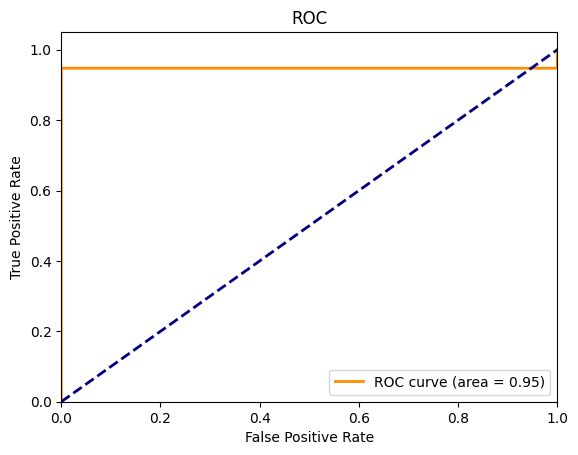

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 10


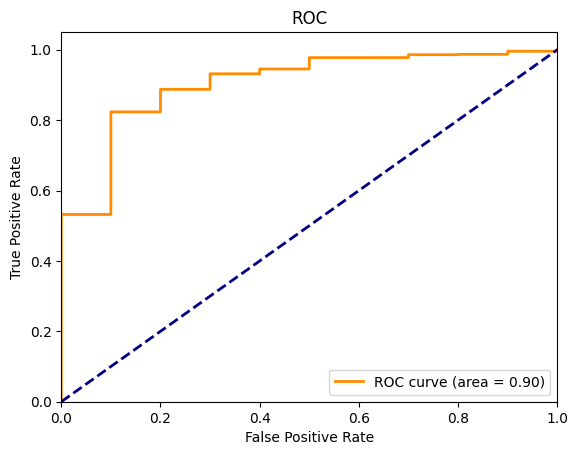

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 50


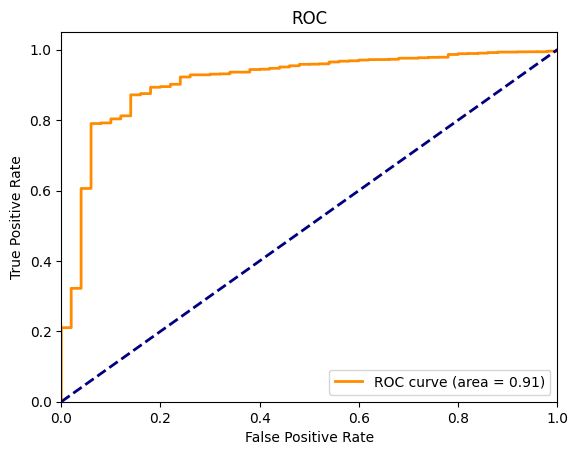

Malicious pairs found in grotenseur[0]:
Author: 331, Paper: 2016
Remaining malicious pairs: 99


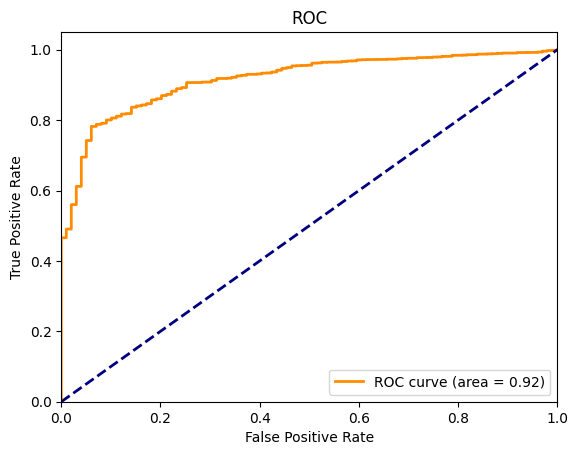

Malicious pairs found in grotenseur[0]:
Author: 308, Paper: 2355
Author: 668, Paper: 387
Remaining malicious pairs: 198


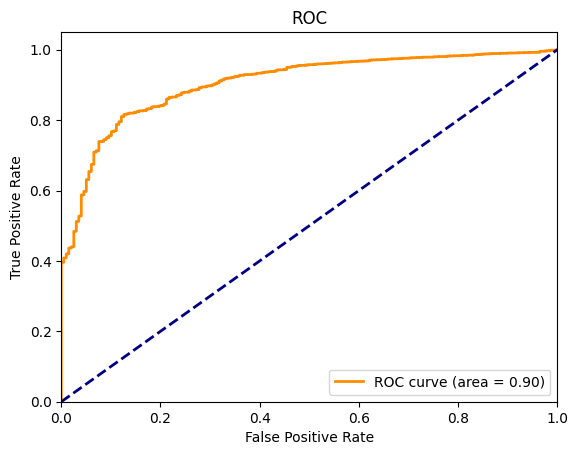

Malicious pairs found in grotenseur[0]:
Author: 1394, Paper: 901
Author: 1821, Paper: 1198
Remaining malicious pairs: 498


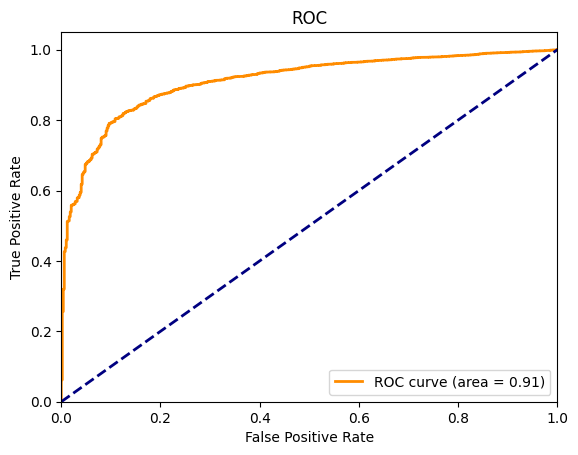

Malicious pairs found in grotenseur[0]:
Author: 814, Paper: 76
Author: 2385, Paper: 1392
Author: 2419, Paper: 1042
Author: 655, Paper: 2233
Author: 263, Paper: 2359
Author: 970, Paper: 1029
Author: 2475, Paper: 122
Author: 1694, Paper: 242
Remaining malicious pairs: 992


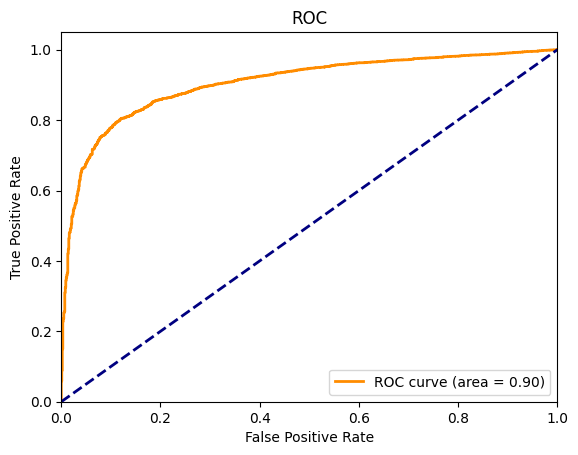

In [ ]:
legrotenseur[1] = 1 - legrotenseur[1]
liste_nb_tricheurs = [1, 10, 50, 100, 200,500,1000]
for i in liste_nb_tricheurs:
  ROC_tricheurs_liste(legrotenseur,i,legrotenseur)

In [ ]:
def lolROC_tricheurs_liste(letenseur, nb_tricheurs,autretenseur=grotenseur):
  ajout_malicious_bids(letenseur,nb_tricheurs,autretenseur)
  #letenseur[1] = 1 - letenseur[1]
  scoreEAGER=[]
  tricheurEAGER=[]
  for i in range (0,len(letenseur[0])):
    for j in range (0,len(letenseur[0][i])):
      if letenseur[0][i][j]==3:
        scoreEAGER.append(letenseur[1][i][j])
        tricheurEAGER.append(letenseur[2][i][j])


  fpr, tpr, thresholds = metrics.roc_curve(tricheurEAGER,scoreEAGER)
  roc_auc = metrics.auc(fpr, tpr)
  return fpr,tpr,roc_auc

In [ ]:
afpr,atpr,a=lolROC_tricheurs_liste(grotenseur,500)
bfpr,btpr,b=lolROC_tricheurs_liste(legrotenseur,500,legrotenseur)

No malicious pairs found in grotenseur[0]
Remaining malicious pairs: 500
Malicious pairs found in grotenseur[0]:
Author: 1267, Paper: 533
Author: 2377, Paper: 1576
Remaining malicious pairs: 498


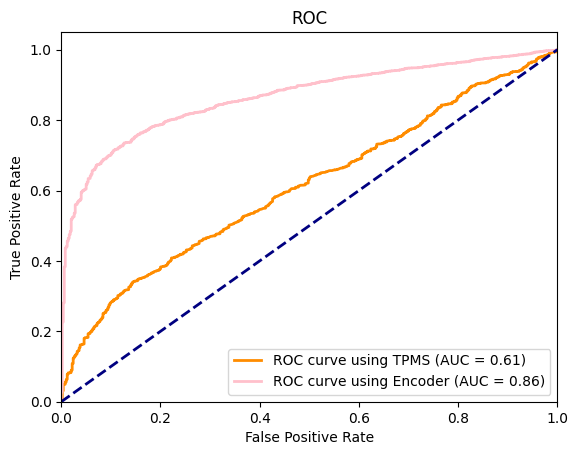

In [ ]:
plt.figure()
plt.plot(afpr, atpr, color='darkorange', lw=2, label='ROC curve using TPMS (AUC = %0.2f)' % a)
plt.plot(bfpr, btpr, color='pink', lw=2, label='ROC curve using Encoder (AUC = %0.2f)' % b)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()